In [1]:
! pwd

/config/workspace/notebooks


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:

df = pd.read_csv("../data/yield_prediction.csv")
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.000,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0,0.825000
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0,0.153846
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0,1.223404


In [3]:
df.isnull().sum()

Unnamed: 0          0
state_names         0
district_names      0
crop_year           0
season_names        0
crop_names          0
area                0
temperature         0
wind_speed          0
pressure            0
humidity            0
soil_type           0
N                   0
P                   0
K                   0
production        132
Yield             132
dtype: int64

In [4]:
df['production']=df['production'].fillna(df['production'].mean())
df['Yield']=df['Yield'].fillna(df['Yield'].mean())

In [6]:
df.drop(['prodcution'],axis=1,inplace=True)

KeyError: "['prodcution'] not found in axis"

In [7]:
df.isnull().sum()

Unnamed: 0        0
state_names       0
district_names    0
crop_year         0
season_names      0
crop_names        0
area              0
temperature       0
wind_speed        0
pressure          0
humidity          0
soil_type         0
N                 0
P                 0
K                 0
production        0
Yield             0
dtype: int64

In [8]:
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.000,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0,0.825000
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0,0.153846
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0,1.223404


from the given dataset there are many outliers for area feature

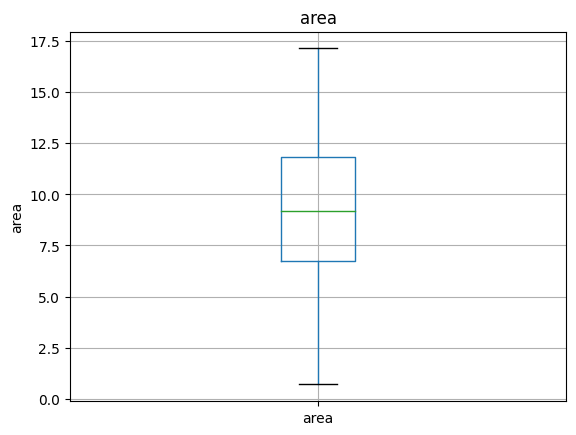

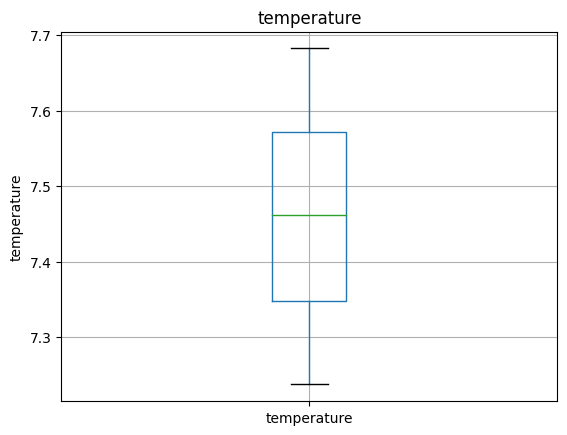

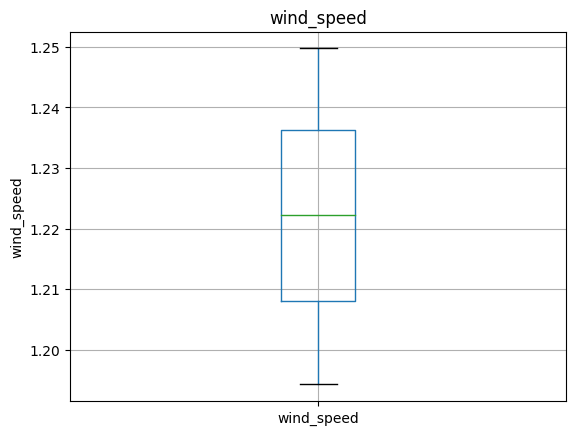

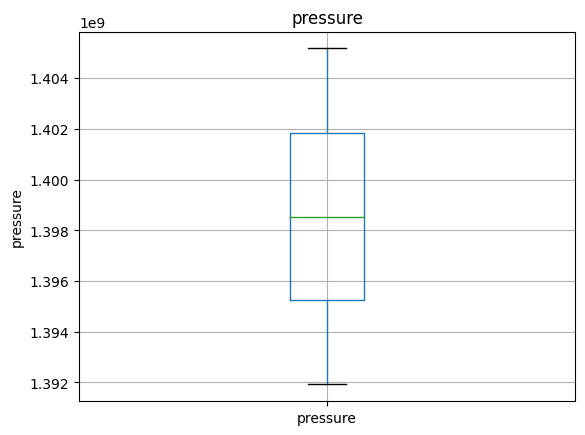

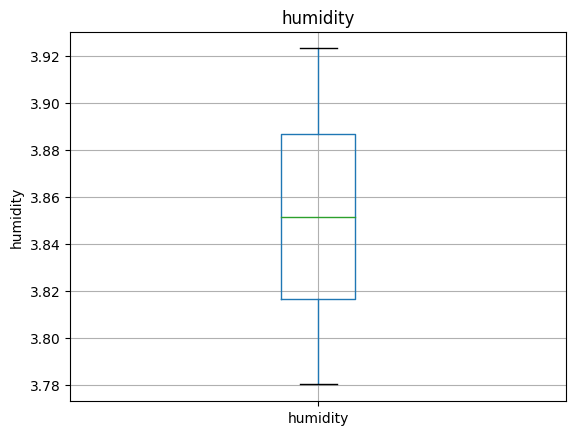

In [58]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        #data[feature]=np.log(data[feature])
        #df[feature],parameters=stat.boxcox(df[feature]+1)
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

/tmp/ipykernel_8058/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

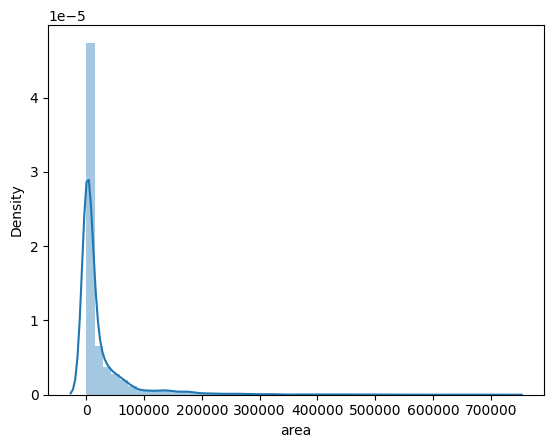

In [10]:
sns.distplot(df['area'])

In [11]:
# Categorical Feature Encoding
# Outlier handling
# Scaling
# Train Test Split

In [12]:
features_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
features_na

[]

Find relationship between missing value and dependent variable

Text(0.5, 1.0, 'production vs yield')

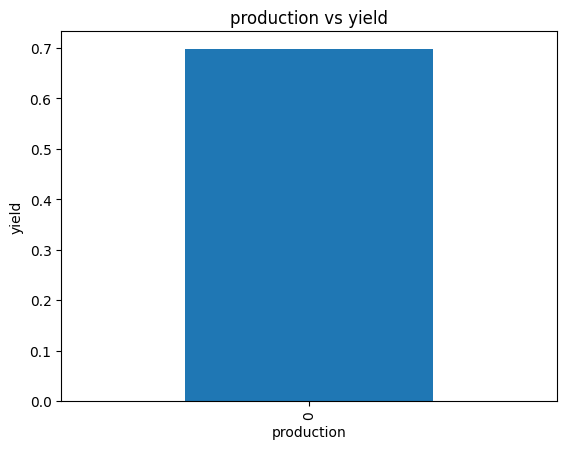

In [13]:
data=df.copy()
data['production']=np.where(data['production'].isnull(),1,0)
data.groupby('production')['Yield'].median().plot.bar()
plt.xlabel('production')
plt.ylabel('yield')
plt.title('production vs yield')

Numerical Variable
    Discrete variable
    continuous variable
Categorical Variable     

Numerical variable

In [14]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
df[numerical_feature].head()

,Unnamed: 0,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,production,Yield
0,125191,1997,1.0,20.770894,2.068260,1014.863796,21.947147,56.07,0.000,0.00,1113.0,1113.000000
1,125192,1997,17600.0,20.160426,1.976480,1015.193528,20.643237,9.00,9.000,0.00,6300.0,0.357955
2,125193,1997,274100.0,21.998299,2.000524,1014.184607,21.422312,0.00,0.000,0.00,152800.0,0.557461
3,125194,1997,40800.0,21.776377,2.019750,1015.053118,21.810567,38.25,38.250,38.25,18600.0,0.455882
4,125195,1997,900.0,20.075734,1.974351,1015.170238,21.930206,0.00,23.184,0.00,1100.0,1.222222


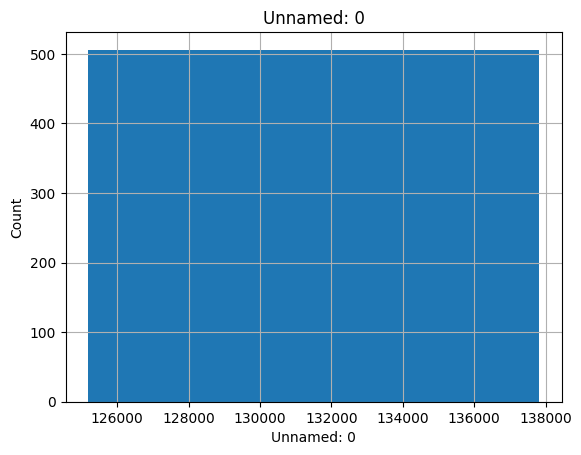

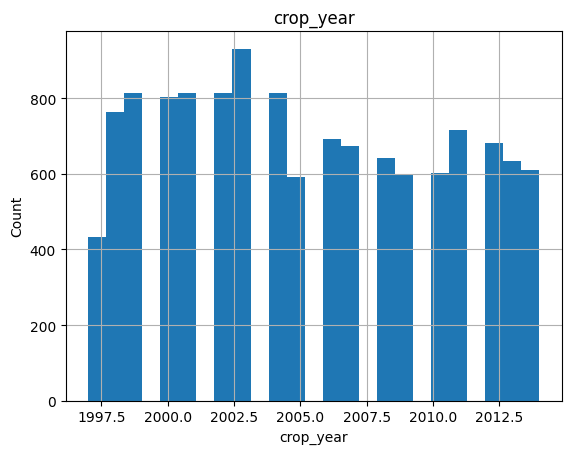

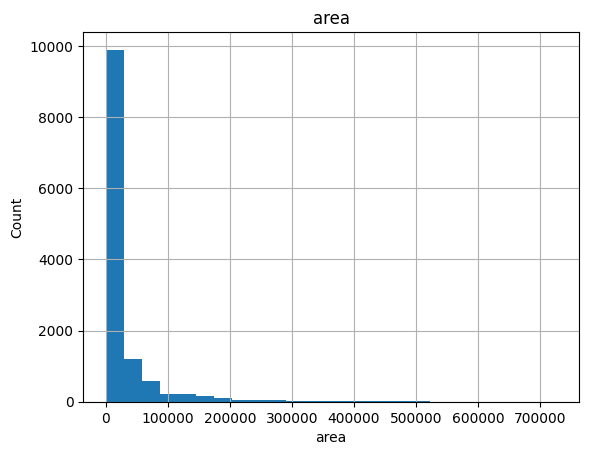

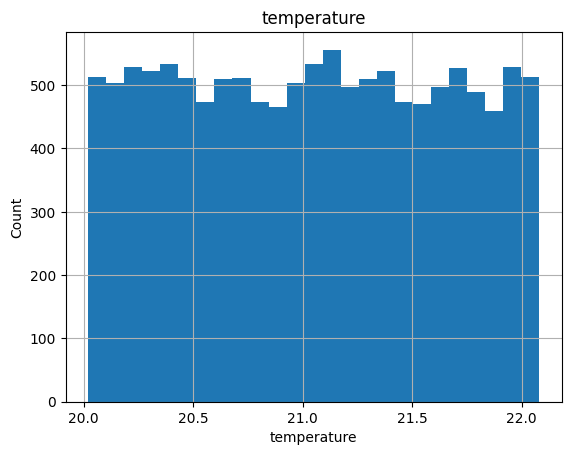

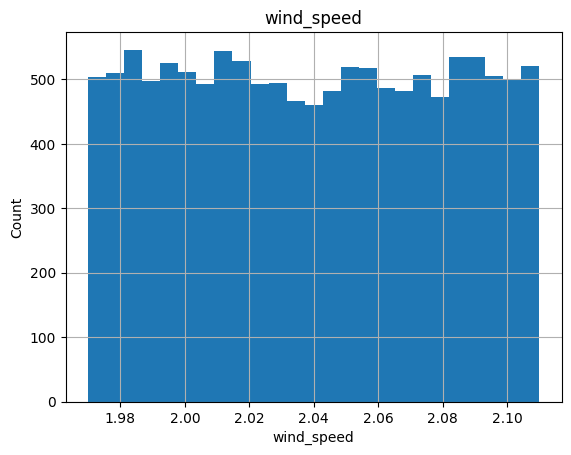

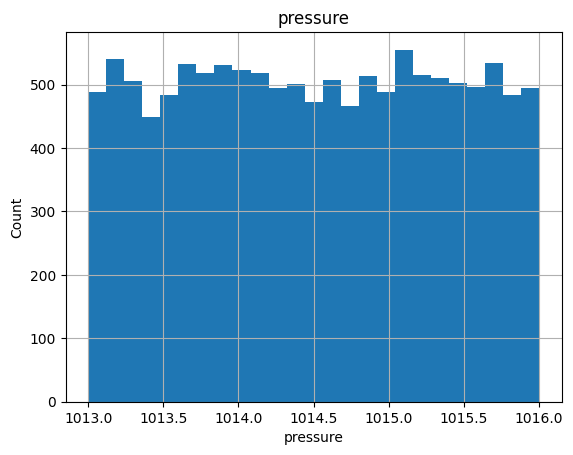

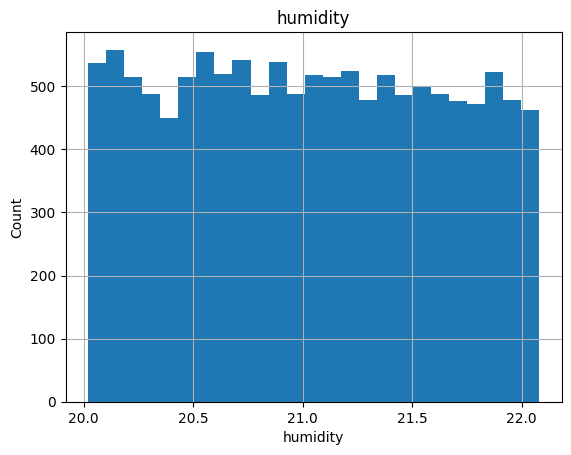

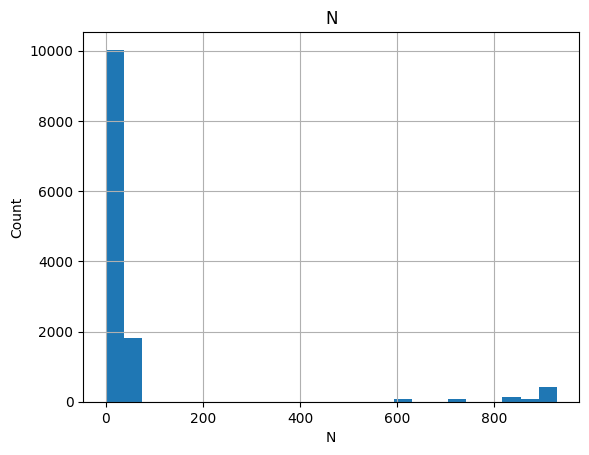

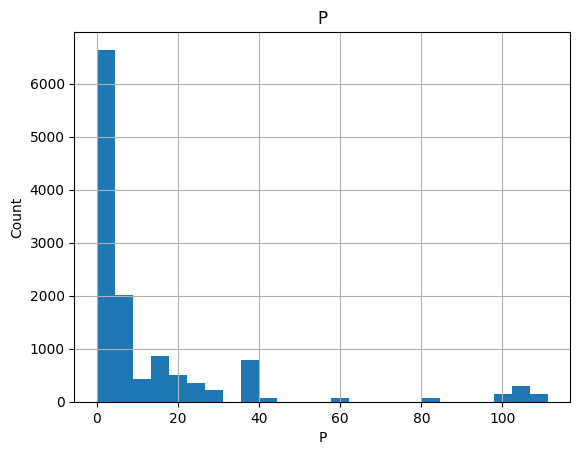

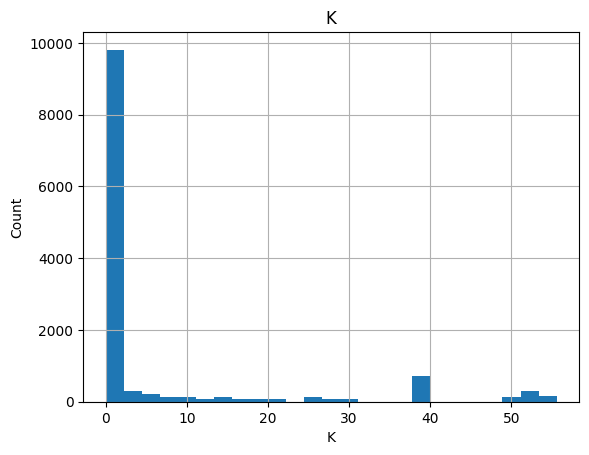

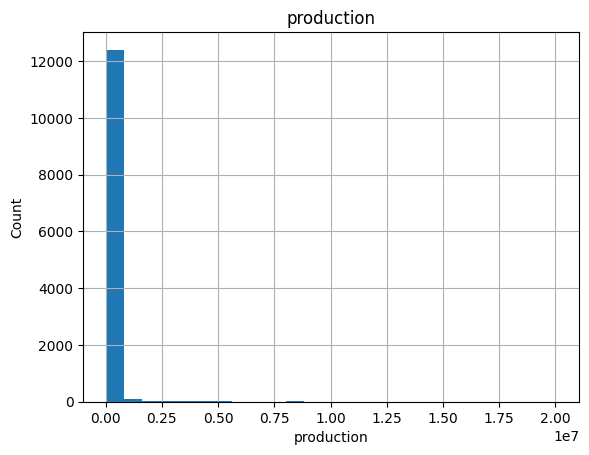

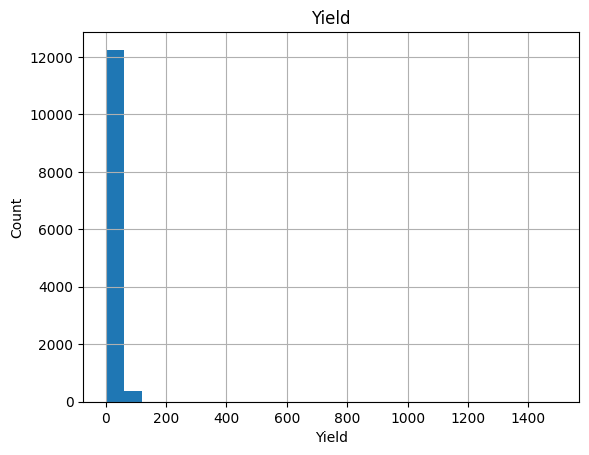

In [15]:
for feature in numerical_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


checking the relation b/w crop year and yield

Text(0.5, 1.0, 'crop yield vs crop year')

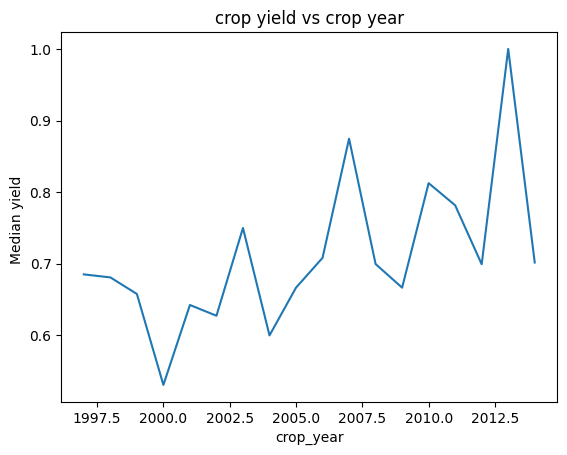

In [16]:
df.groupby('crop_year')['Yield'].median().plot()
plt.xlabel('crop_year')
plt.ylabel('Median yield ')
plt.title("crop yield vs crop year")

discrete variable

In [17]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print(len(discrete_feature))
#df['discrete_feature'].head()

1


In [18]:
df[discrete_feature].head()

,crop_year
0,1997
1,1997
2,1997
3,1997
4,1997


continuous variable

In [19]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature+['Unnamed: 0']+['crop_year']]
df[continuous_feature].head()

,area,temperature,wind_speed,pressure,humidity,N,P,K,production,Yield
0,1.0,20.770894,2.068260,1014.863796,21.947147,56.07,0.000,0.00,1113.0,1113.000000
1,17600.0,20.160426,1.976480,1015.193528,20.643237,9.00,9.000,0.00,6300.0,0.357955
2,274100.0,21.998299,2.000524,1014.184607,21.422312,0.00,0.000,0.00,152800.0,0.557461
3,40800.0,21.776377,2.019750,1015.053118,21.810567,38.25,38.250,38.25,18600.0,0.455882
4,900.0,20.075734,1.974351,1015.170238,21.930206,0.00,23.184,0.00,1100.0,1.222222


Analysing the continuous variable to understand the distribution using plots

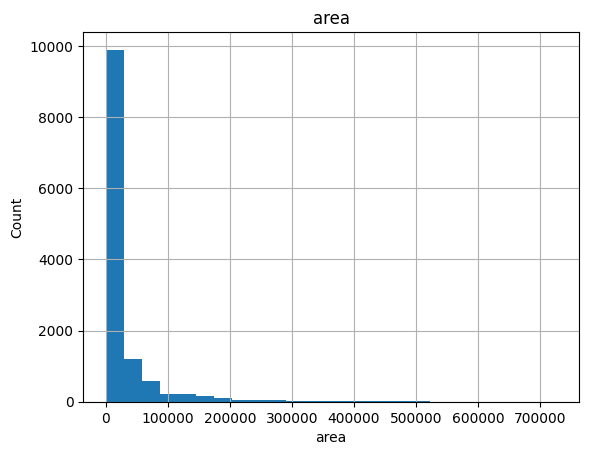

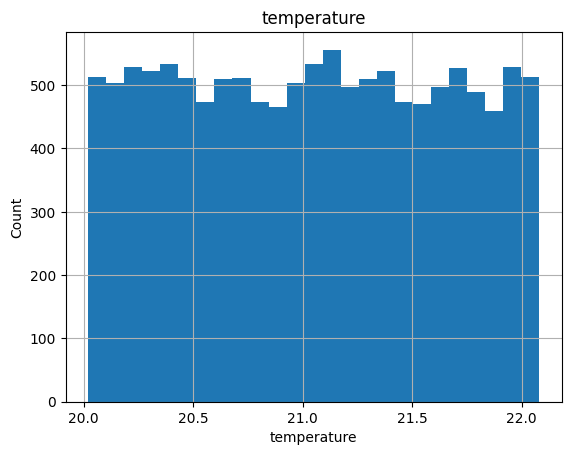

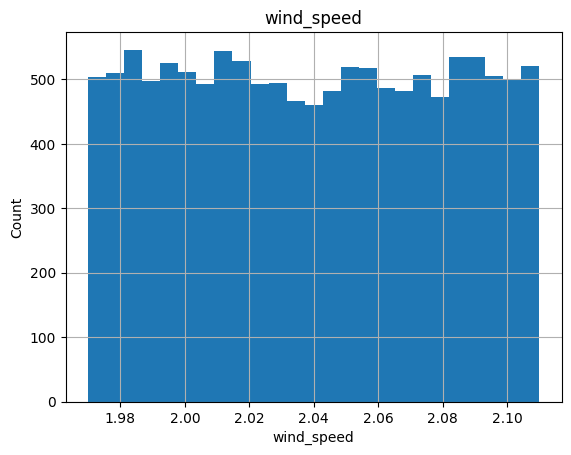

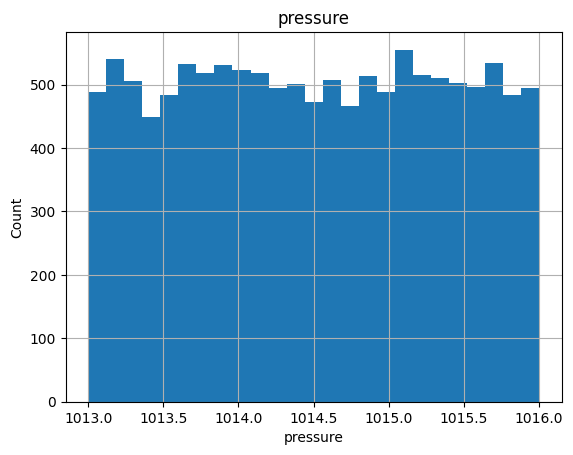

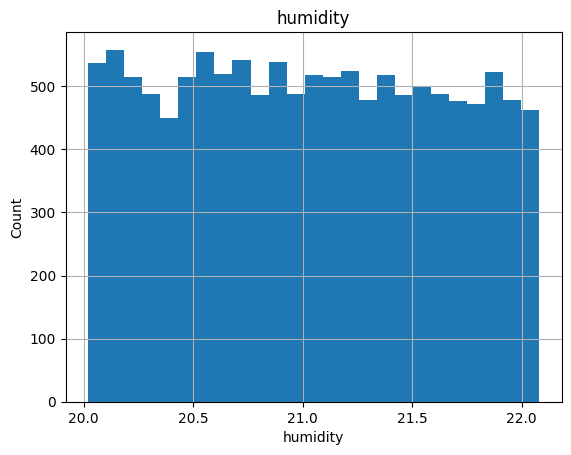

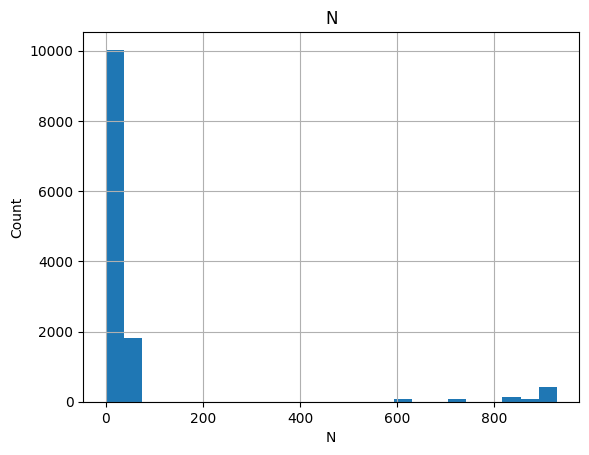

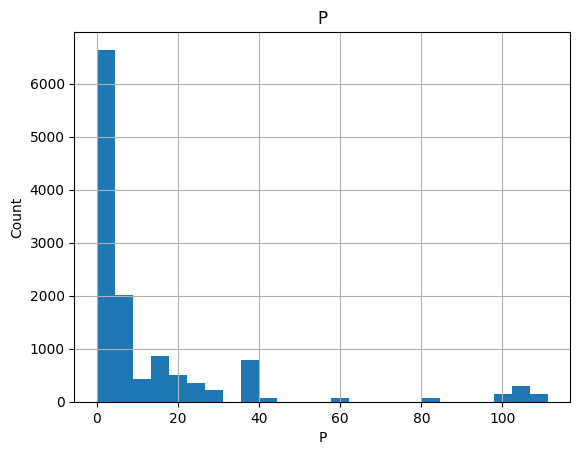

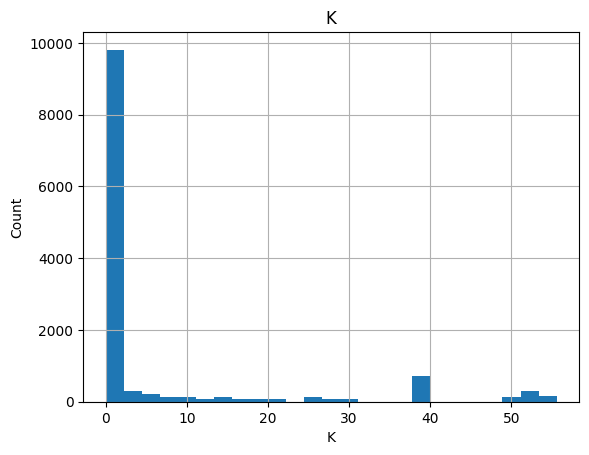

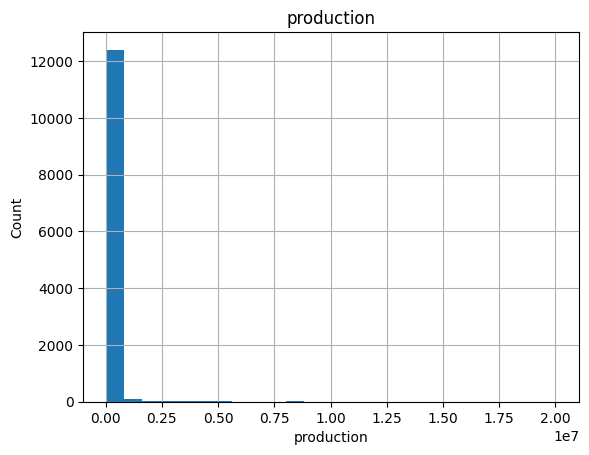

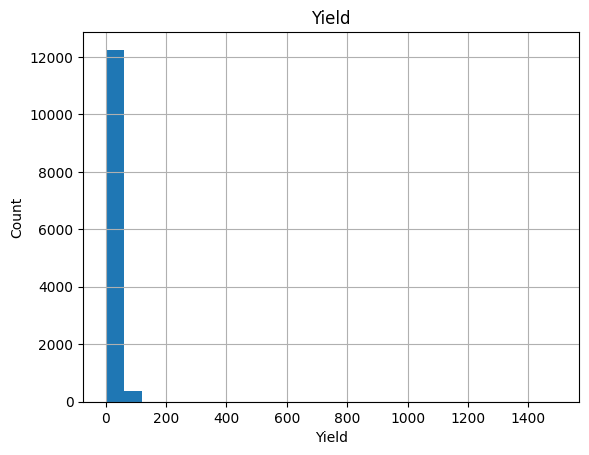

In [20]:

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [21]:
len(df.crop_year.unique())

18

applying logarithmic transformation to get guassian distribution

In [22]:
import scipy.stats as stat
import pylab 

In [23]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.xlabel(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

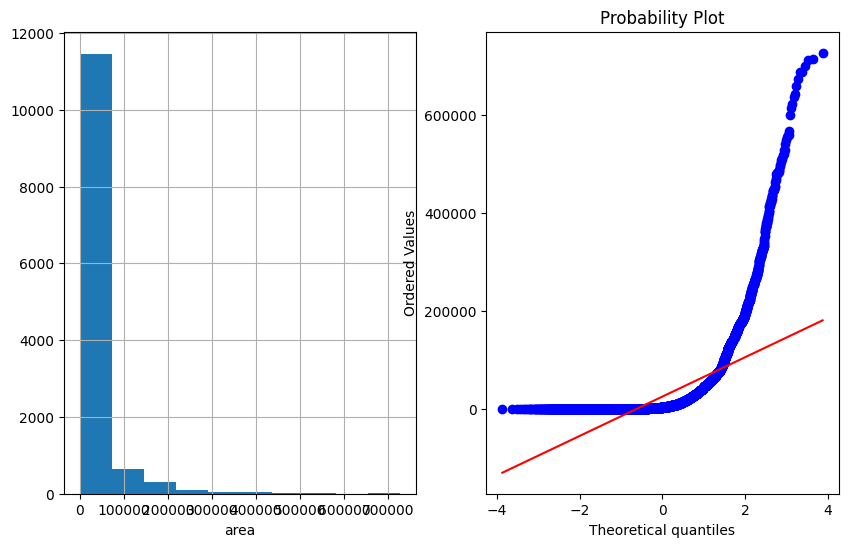

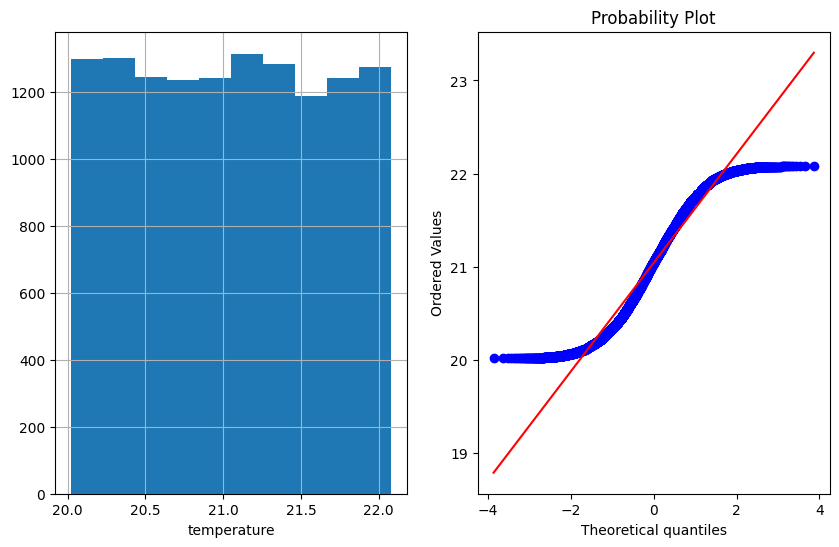

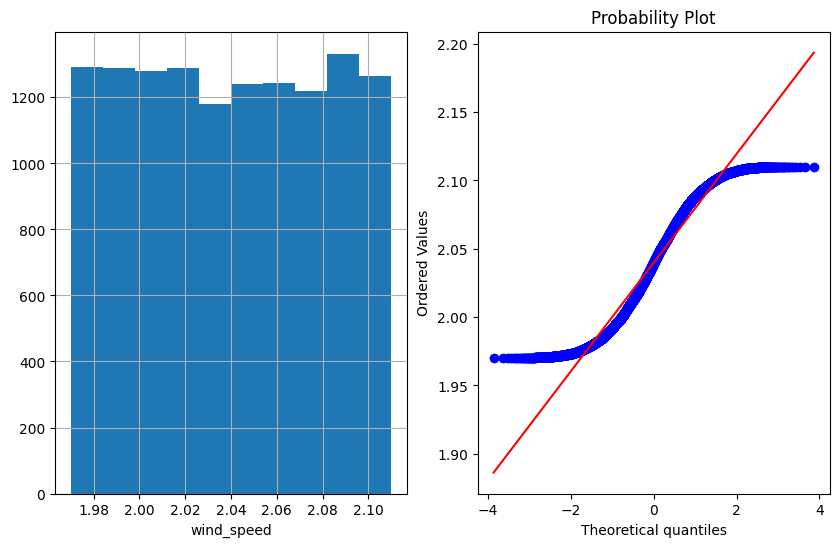

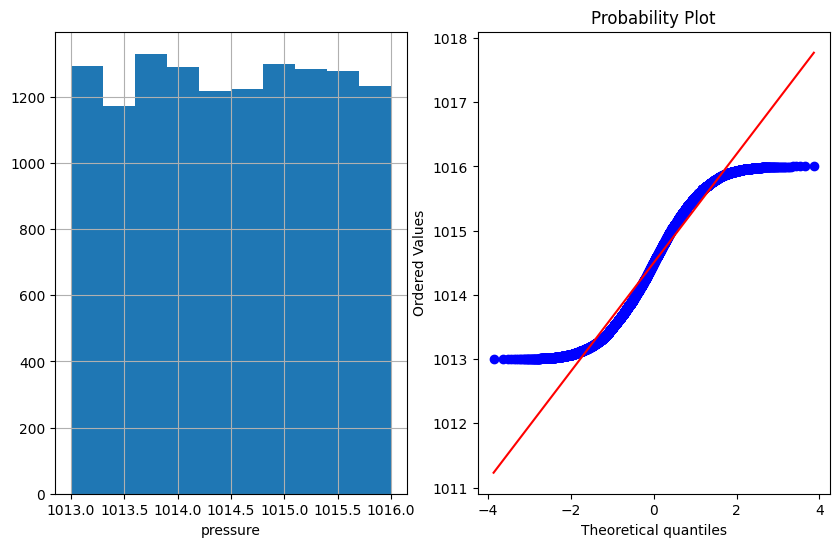

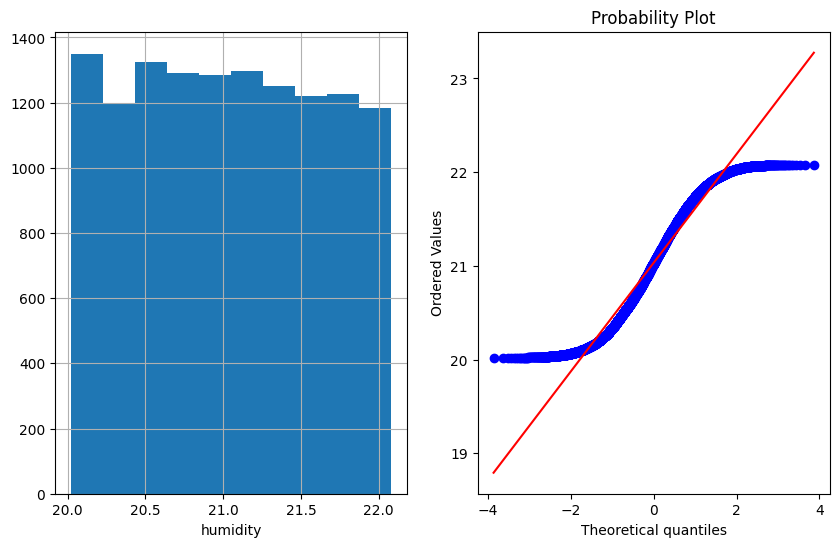

In [24]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plot_data(df,feature)
       
         
        

/config/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


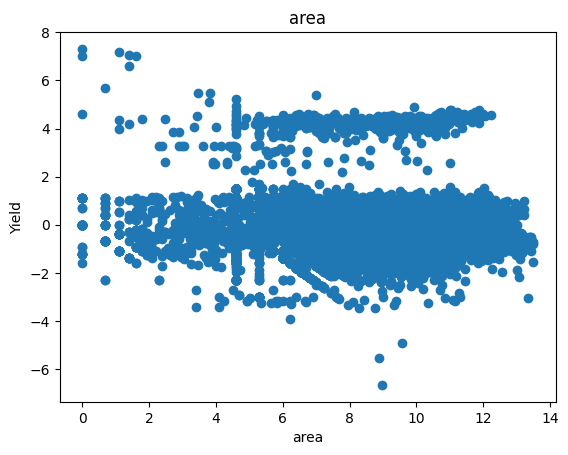

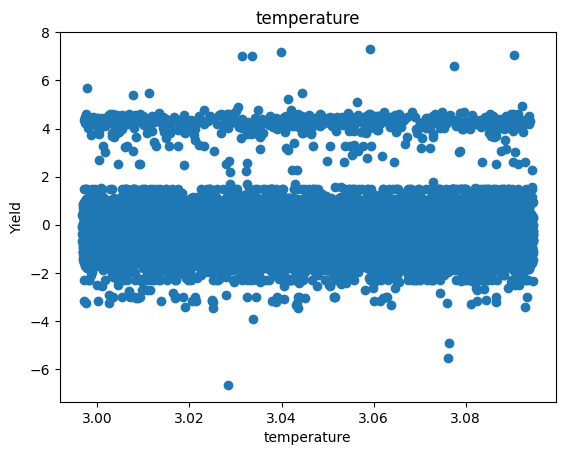

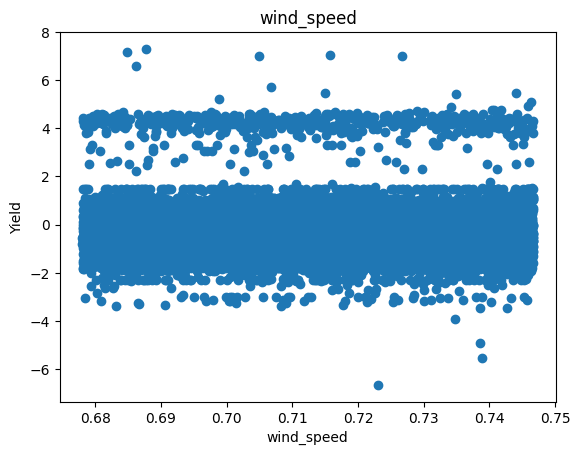

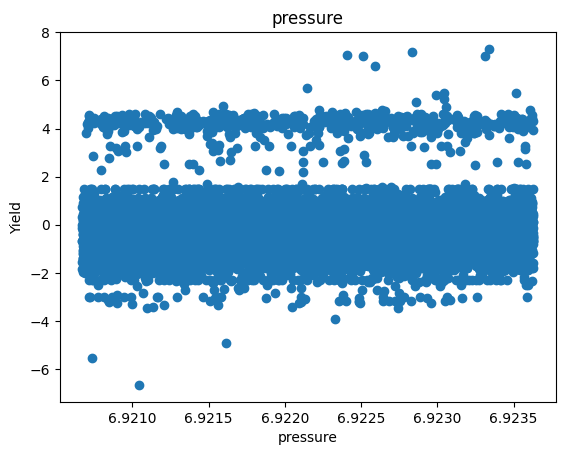

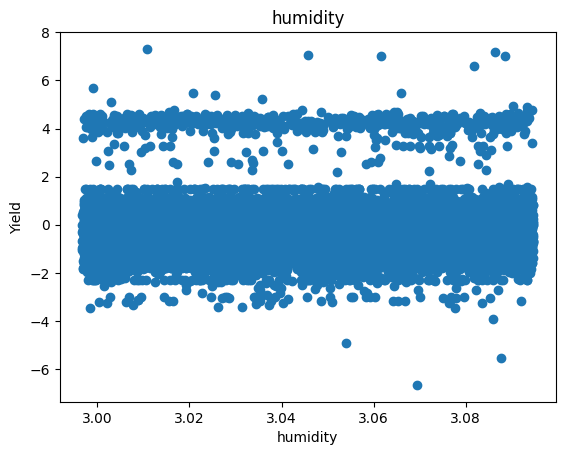

In [25]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Yield']=np.log(data['Yield'])
        plt.scatter(data[feature],data['Yield'])
        plt.xlabel(feature)
        plt.ylabel('Yield')
        plt.title(feature)
        plt.show()
        

In [26]:
import scipy.stats as stat
import pylab 

In [27]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

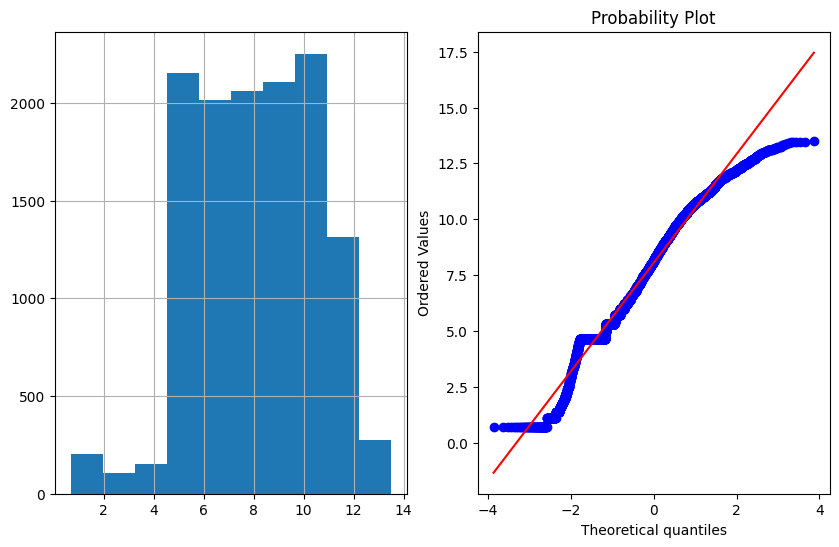

In [ ]:

df['Area_log']=np.log1p(df['area'])
plot_data(df,'Area_log')

Reciprocal Transformation

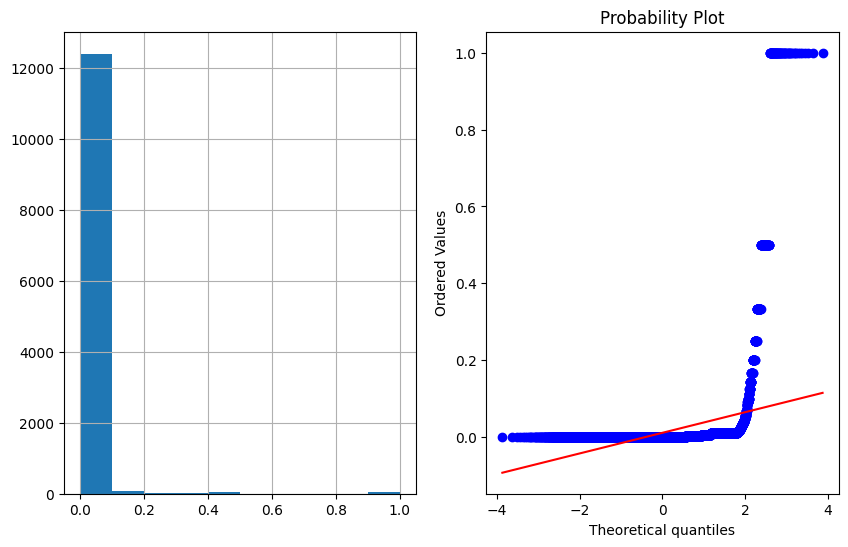

In [ ]:
df['Area_reciprocal']=1/df.area
plot_data(df,'Area_reciprocal')

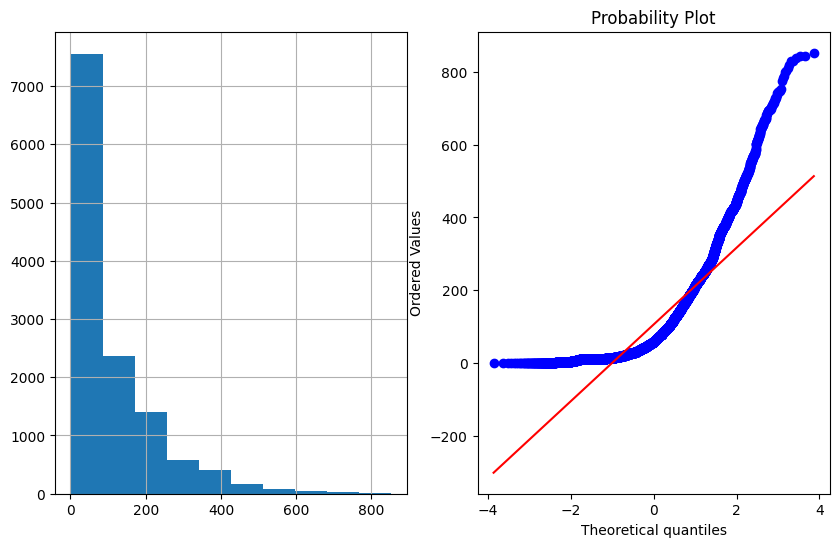

In [ ]:
##### Square Root Transformation
df['Area_sqaure']=df.area**(1/2)
plot_data(df,'Area_sqaure')

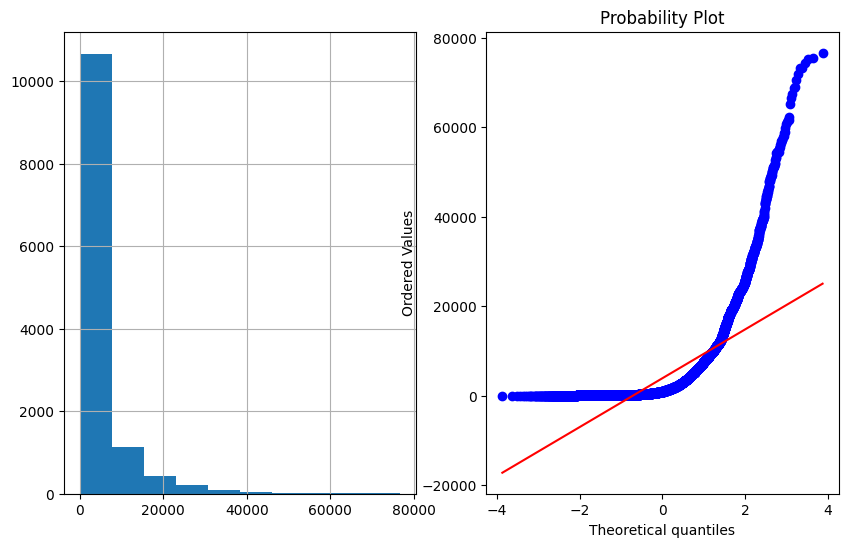

In [ ]:
#### Exponential Transdormation
df['Area_exponential']=df.area**(1/1.2)
plot_data(df,'Area_exponential')

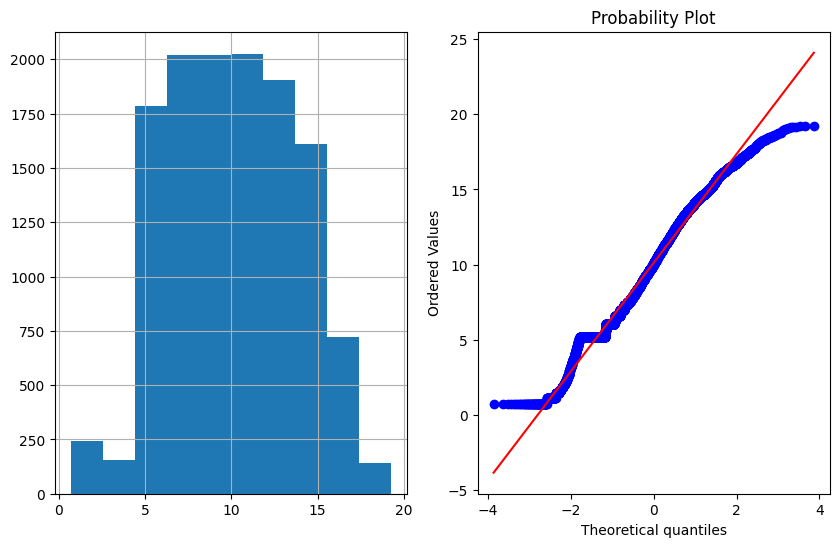

In [ ]:
#Boxcox Transformation
df['Fare_Boxcox'],parameters=stat.boxcox(df['area']+1)
plot_data(df,'Fare_Boxcox')

from the above analysis the area is normally distributed by using Boxcox transformation

In [ ]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,...,N,P,K,production,Yield,Area_log,Area_reciprocal,Area_sqaure,Area_exponential,Fare_Boxcox
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,...,56.07,0.000,0.00,1113.0,1113.000000,0.693147,1.000000,1.000000,1.000000,0.705265
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,...,9.00,9.000,0.00,6300.0,0.357955,9.775711,0.000057,132.664992,3450.859068,12.597502
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,...,0.00,0.000,0.00,152800.0,0.557461,12.521252,0.000004,523.545605,34008.765139,17.388040
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,...,38.25,38.250,38.25,18600.0,0.455882,10.616462,0.000025,201.990099,6953.713648,13.995455
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,...,0.00,23.184,0.00,1100.0,1.222222,6.803505,0.001111,30.000000,289.646815,8.099854


before applying transformation the distribution of area is not normal

<AxesSubplot: >

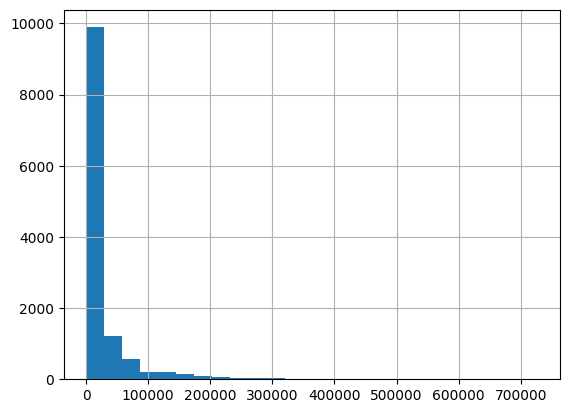

In [ ]:
 df['area'].hist(bins=25)

after applying different methods of transformation, boxcox gives the normal distribution 

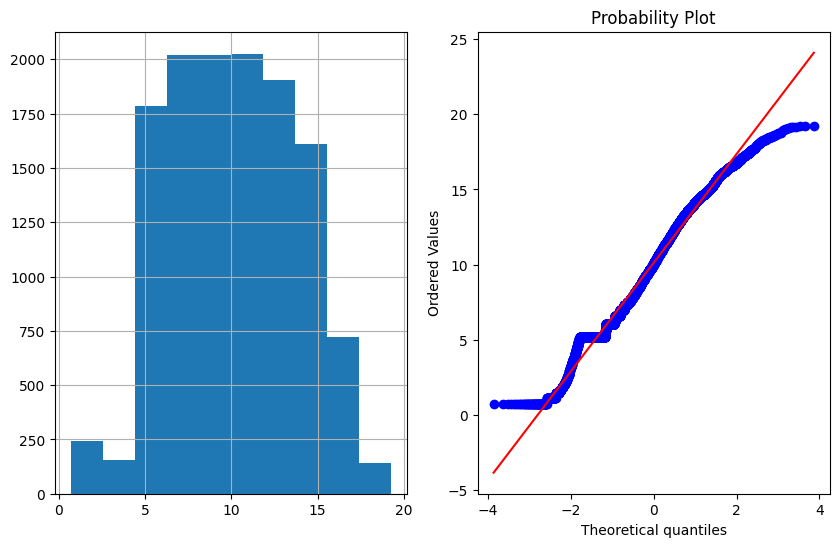

In [28]:
df['area'],parameters=stat.boxcox(df['area']+1)
plot_data(df,'area')

In [30]:
pd.pandas.set_option('display.max_columns',None)
df.head()


,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,0.705265,20.770894,2.068260,1014.863796,21.947147,loamy,56.07,0.000,0.00,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,12.597502,20.160426,1.976480,1015.193528,20.643237,sandy,9.00,9.000,0.00,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,17.388040,21.998299,2.000524,1014.184607,21.422312,clay,0.00,0.000,0.00,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,13.995455,21.776377,2.019750,1015.053118,21.810567,chalky,38.25,38.250,38.25,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,8.099854,20.075734,1.974351,1015.170238,21.930206,clay,0.00,23.184,0.00,1100.0,1.222222


<AxesSubplot: >

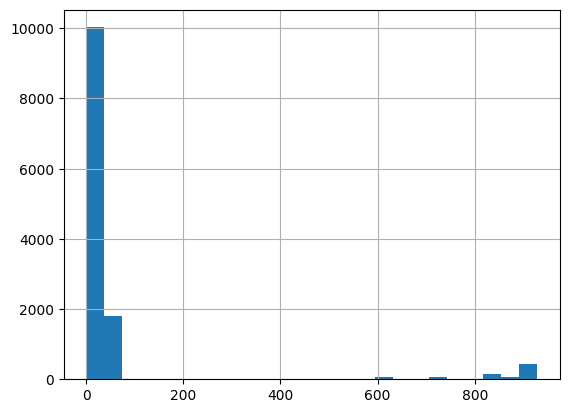

In [ ]:
 df['N'].hist(bins=25)

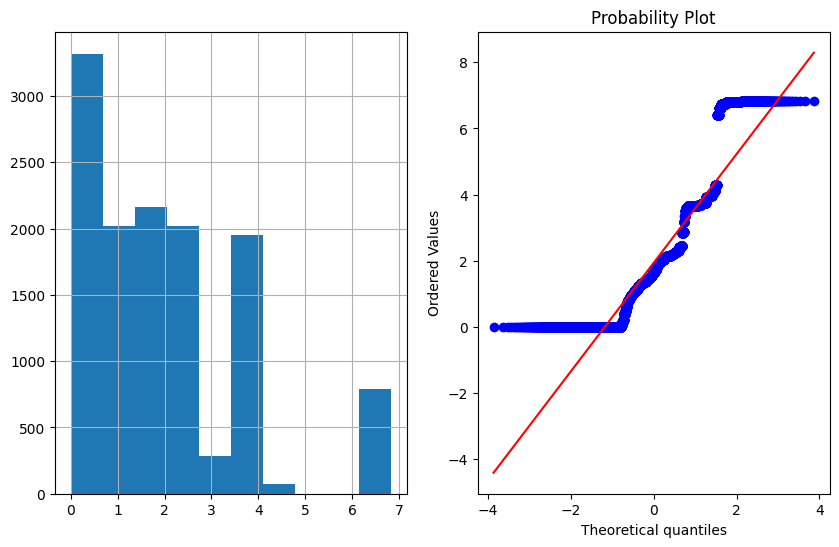

In [ ]:
#log transformation
df['N_log']=np.log1p(df['N'])
plot_data(df,'N_log')

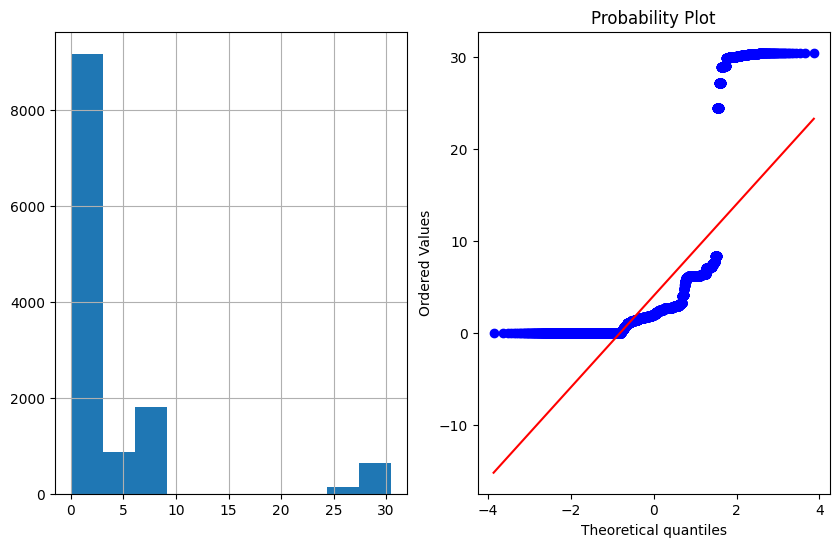

In [ ]:
##### Square Root Transformation
df['N_sqaure']=df.N**(1/2)
plot_data(df,'N_sqaure')

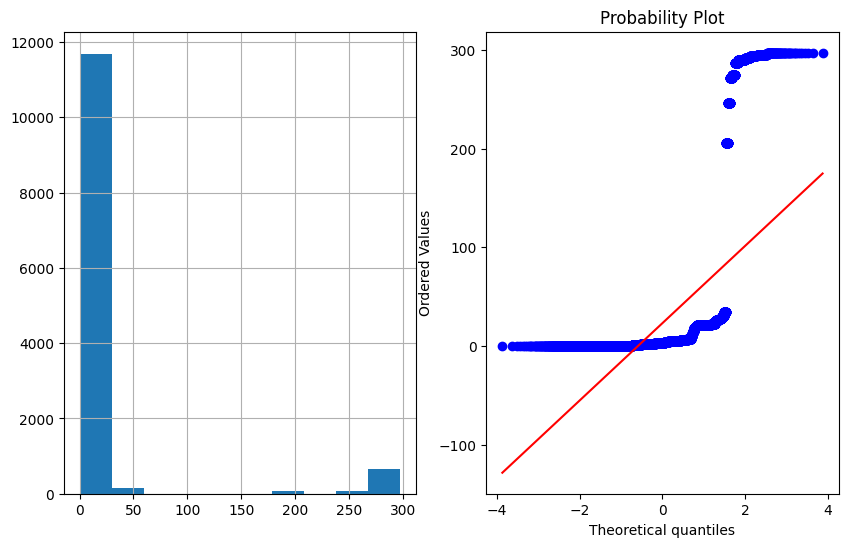

In [ ]:
#### Exponential Transdormation
df['N_exponential']=df.N**(1/1.2)
plot_data(df,'N_exponential')

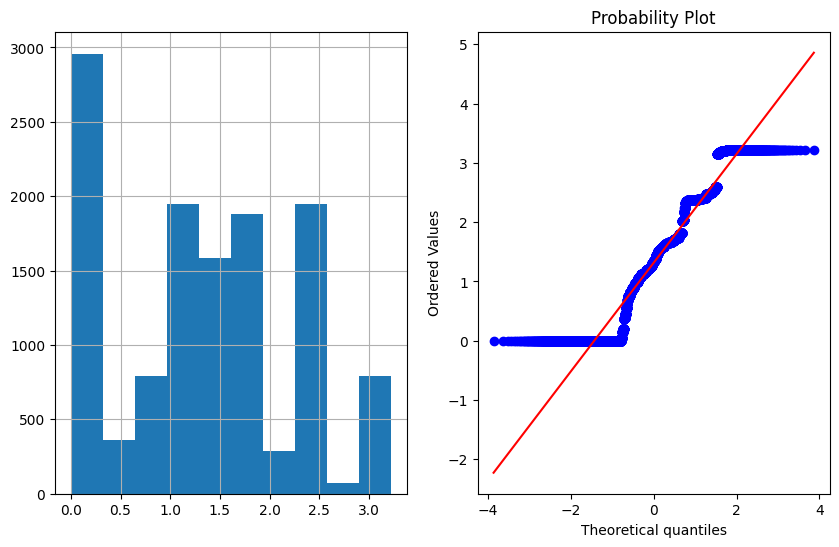

In [ ]:
## Boxcox transformation
df['N_Boxcox'],parameters=stat.boxcox(df['N']+1)
plot_data(df,'N_Boxcox')

In [ ]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield,Area_log,Area_reciprocal,Area_sqaure,Area_exponential,Fare_Boxcox,N_log,N_sqaure,N_exponential,N_Boxcox
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,0.705265,20.770894,2.068260,1014.863796,21.947147,loamy,56.07,0.000,0.00,1113.0,1113.000000,0.693147,1.000000,1.000000,1.000000,0.705265,4.044279,7.487990,28.659952,2.517363
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,12.597502,20.160426,1.976480,1015.193528,20.643237,sandy,9.00,9.000,0.00,6300.0,0.357955,9.775711,0.000057,132.664992,3450.859068,12.597502,2.302585,3.000000,6.240251,1.738996
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,17.388040,21.998299,2.000524,1014.184607,21.422312,clay,0.00,0.000,0.00,152800.0,0.557461,12.521252,0.000004,523.545605,34008.765139,17.388040,0.000000,0.000000,0.000000,0.000000
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,13.995455,21.776377,2.019750,1015.053118,21.810567,chalky,38.25,38.250,38.25,18600.0,0.455882,10.616462,0.000025,201.990099,6953.713648,13.995455,3.669951,6.184658,20.838168,2.378081
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,8.099854,20.075734,1.974351,1015.170238,21.930206,clay,0.00,23.184,0.00,1100.0,1.222222,6.803505,0.001111,30.000000,289.646815,8.099854,0.000000,0.000000,0.000000,0.000000


For 'N' feature Boxcox gives normal distribution

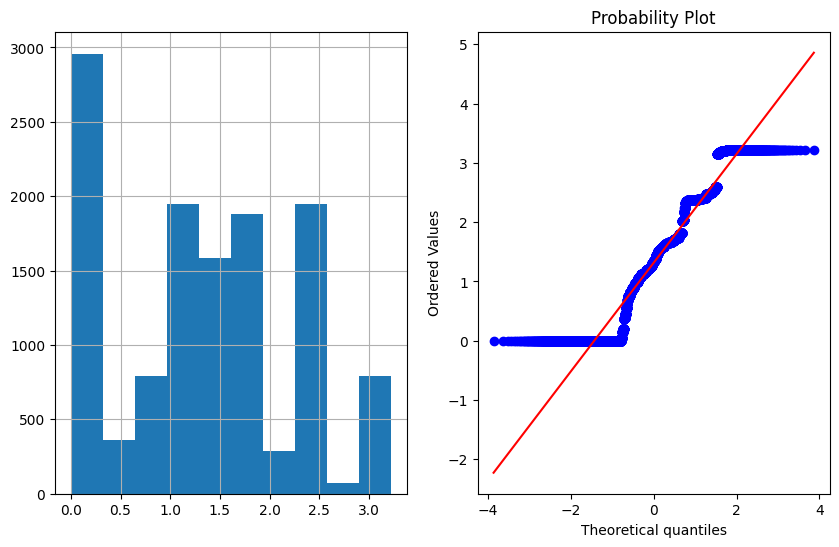

In [29]:
df['N'],parameters=stat.boxcox(df['N']+1)
plot_data(df,'N')

For 'P' feature analysing the distribution

<Axes: >

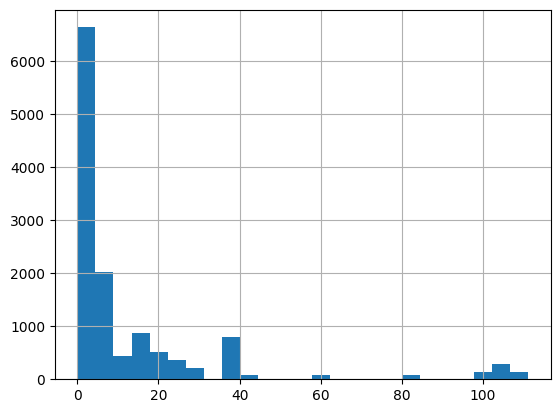

In [32]:
 df['P'].hist(bins=25)

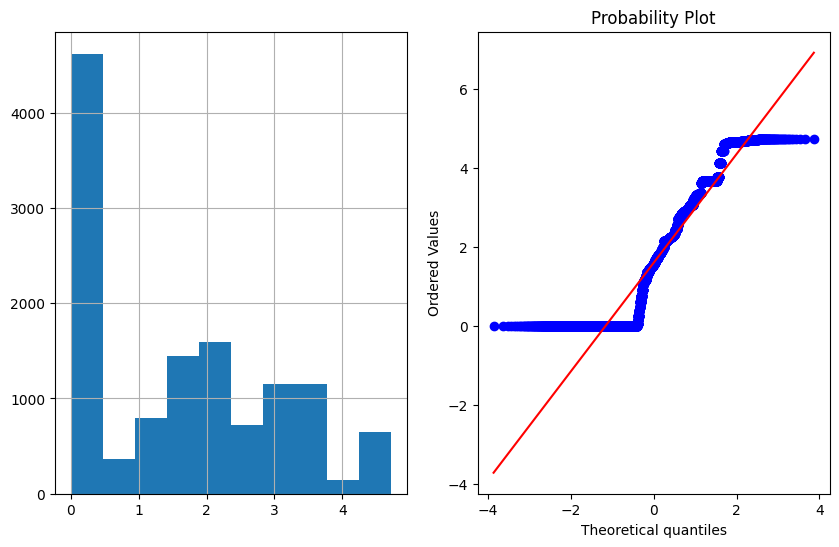

In [ ]:
df['P_log']=np.log1p(df['P'])
plot_data(df,'P_log')

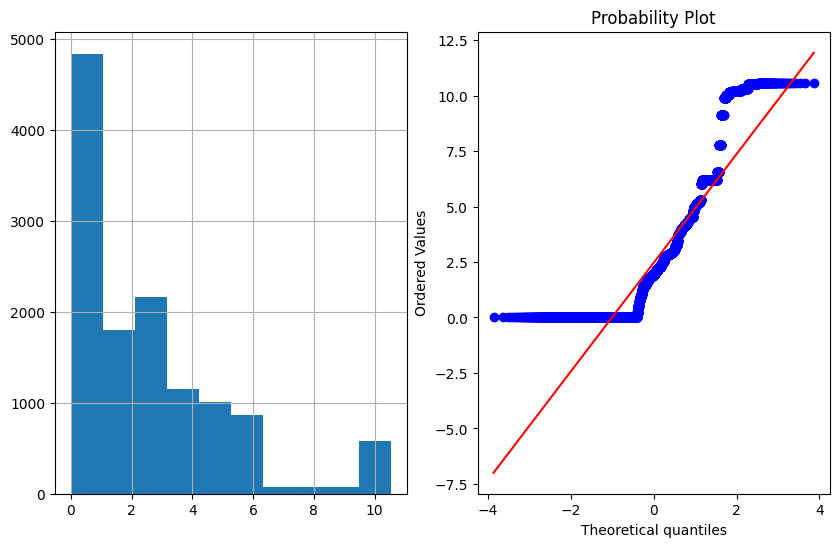

In [ ]:
##### Square Root Transformation
df['P_sqaure']=df.P**(1/2)
plot_data(df,'P_sqaure')

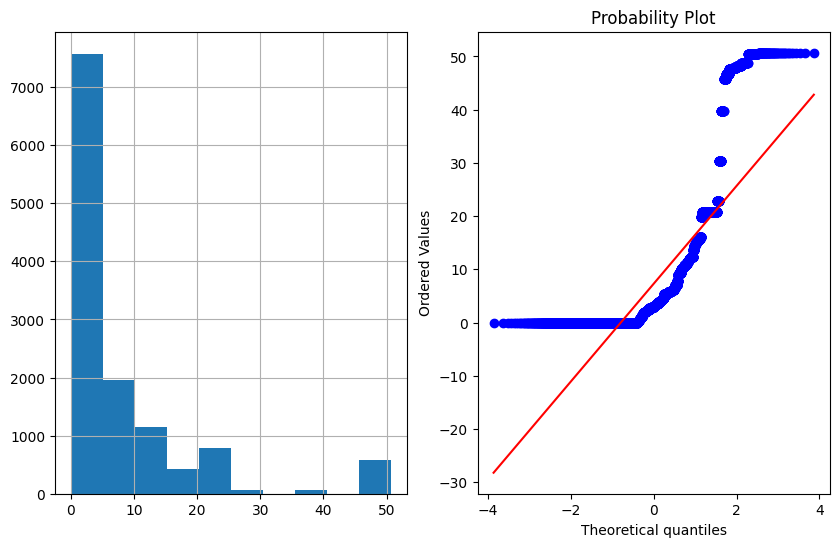

In [ ]:
#### Exponential Transdormation
df['P_exponential']=df.P**(1/1.2)
plot_data(df,'P_exponential')

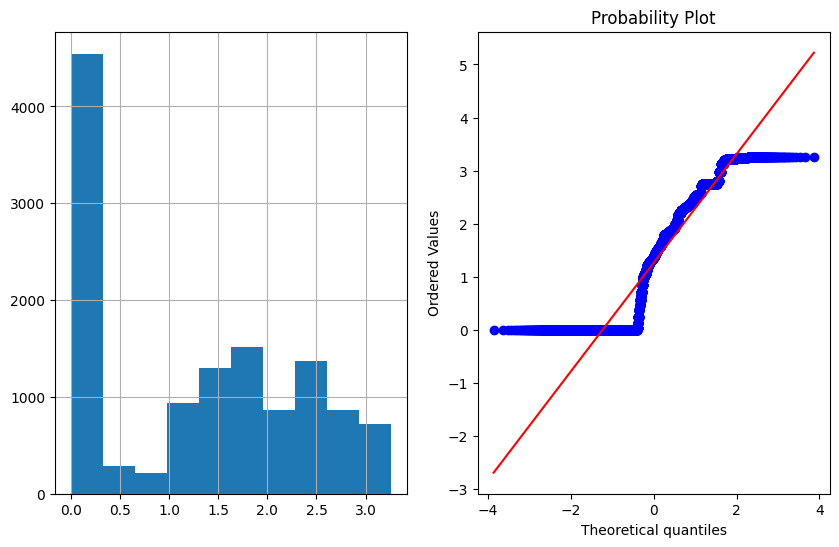

In [ ]:
## Boxcox transformation
df['P_Boxcox'],parameters=stat.boxcox(df['P']+1)
plot_data(df,'P_Boxcox')

By analysis boxcox transformation gives better distribution

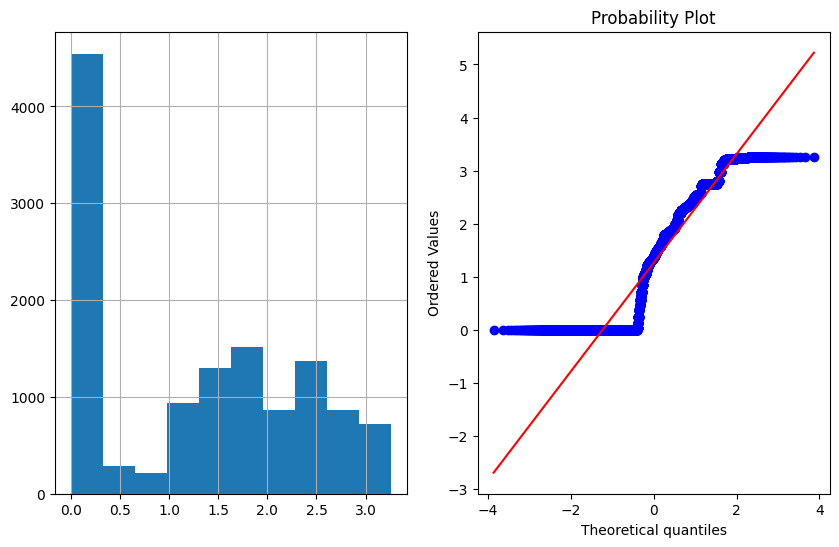

In [30]:
df['P'],parameters=stat.boxcox(df['P']+1)
plot_data(df,'P')

In [34]:
df.head()

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,0.705265,20.770894,2.068260,1014.863796,21.947147,loamy,2.517363,0.000000,0.00,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,12.597502,20.160426,1.976480,1015.193528,20.643237,sandy,1.738996,1.909784,0.00,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,17.388040,21.998299,2.000524,1014.184607,21.422312,clay,0.000000,0.000000,0.00,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,13.995455,21.776377,2.019750,1015.053118,21.810567,chalky,2.378081,2.739889,38.25,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,8.099854,20.075734,1.974351,1015.170238,21.930206,clay,0.000000,2.467429,0.00,1100.0,1.222222


for 'K' feature transformation

<AxesSubplot: >

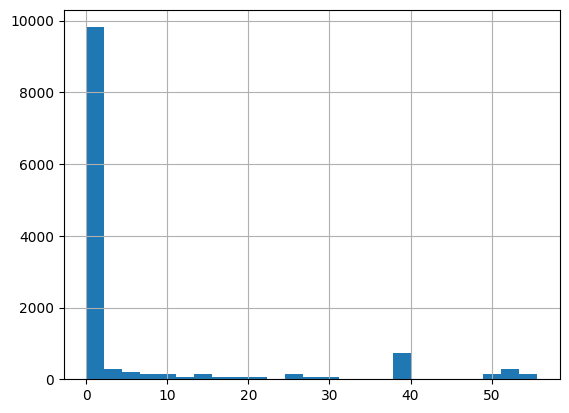

In [ ]:
 df['K'].hist(bins=25)

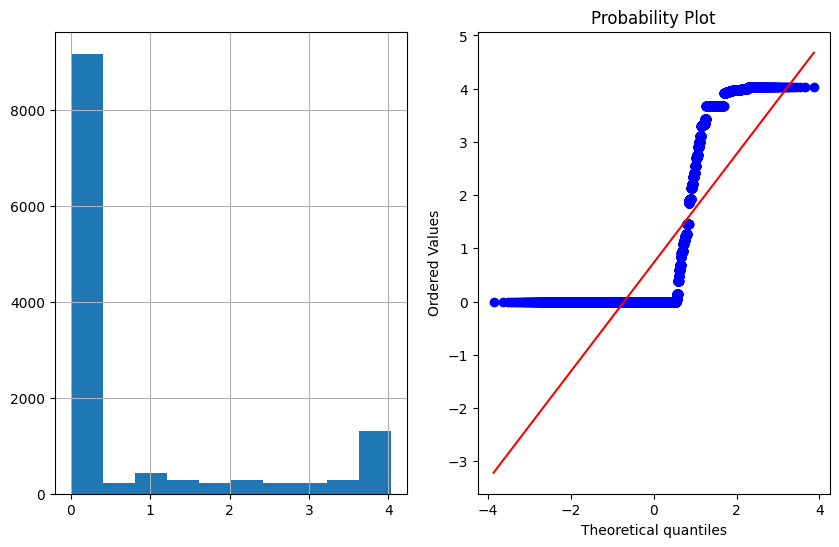

In [ ]:
df['K_log']=np.log1p(df['K'])
plot_data(df,'K_log')

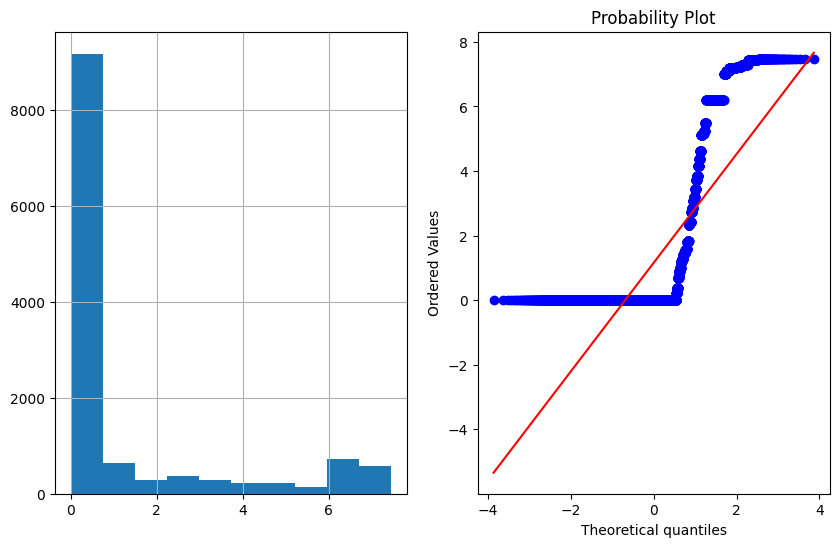

In [ ]:
##### Square Root Transformation
df['K_sqaure']=df.K**(1/2)
plot_data(df,'K_sqaure')

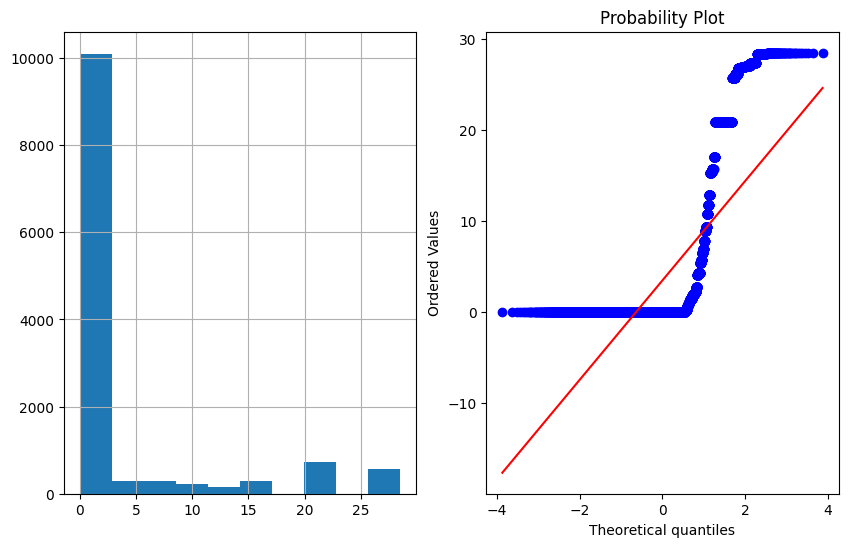

In [ ]:
#### Exponential Transdormation
df['K_exponential']=df.K**(1/1.2)
plot_data(df,'K_exponential')

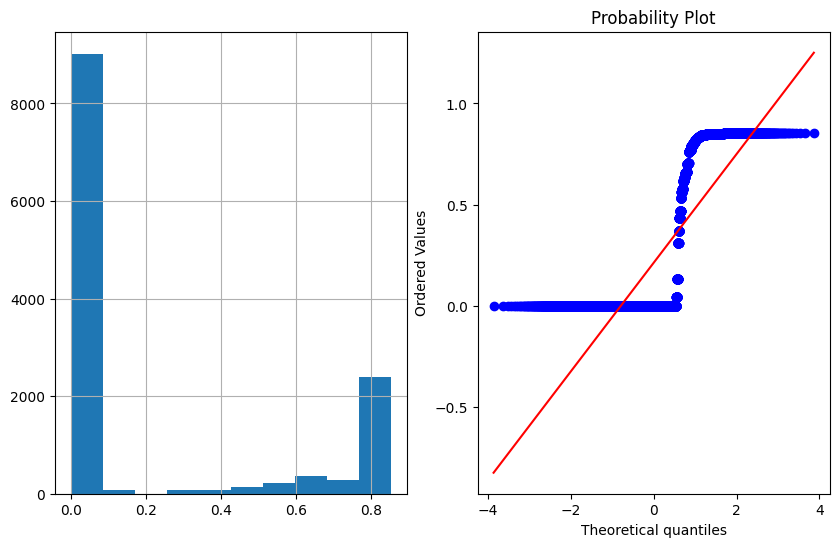

In [ ]:
## Boxcox transformation
df['K_Boxcox'],parameters=stat.boxcox(df['K']+1)
plot_data(df,'K_Boxcox')

In [ ]:
df.head(20)

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield,Area_log,Area_reciprocal,Area_sqaure,Area_exponential,Fare_Boxcox,N_log,N_sqaure,N_exponential,N_Boxcox,P_log,P_sqaure,P_exponential,P_Boxcox,K_log,K_sqaure,K_exponential,K_Boxcox
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,0.705265,20.770894,2.068260,1014.863796,21.947147,loamy,2.517363,0.000000,0.000,1113.0,1113.000000,0.693147,1.000000,1.000000,1.000000,0.705265,4.044279,7.487990,28.659952,2.517363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,12.597502,20.160426,1.976480,1015.193528,20.643237,sandy,1.738996,1.909784,0.000,6300.0,0.357955,9.775711,0.000057,132.664992,3450.859068,12.597502,2.302585,3.000000,6.240251,1.738996,2.302585,3.000000,6.240251,1.909784,0.000000,0.000000,0.000000,0.000000
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,17.388040,21.998299,2.000524,1014.184607,21.422312,clay,0.000000,0.000000,0.000,152800.0,0.557461,12.521252,0.000004,523.545605,34008.765139,17.388040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,13.995455,21.776377,2.019750,1015.053118,21.810567,chalky,2.378081,2.739889,38.250,18600.0,0.455882,10.616462,0.000025,201.990099,6953.713648,13.995455,3.669951,6.184658,20.838168,2.378081,3.669951,6.184658,20.838168,2.739889,3.669951,6.184658,20.838168,0.850258
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,8.099854,20.075734,1.974351,1015.170238,21.930206,clay,0.000000,2.467429,0.000,1100.0,1.222222,6.803505,0.001111,30.000000,289.646815,8.099854,0.000000,0.000000,0.000000,0.000000,3.185691,4.814977,13.729571,2.467429,0.000000,0.000000,0.000000,0.000000
5,125196,Maharashtra,AHMEDNAGAR,1997,Kharif,Maize,10.416928,21.642354,2.075066,1015.702482,21.571403,sandy,1.499769,2.203492,14.664,4700.0,1.068182,8.389587,0.000227,66.332496,1086.952495,10.416928,1.893112,2.374868,4.227328,1.499769,2.751365,3.829360,9.372966,2.203492,2.751365,3.829360,9.372966,0.826988
6,125197,Maharashtra,AHMEDNAGAR,1997,Kharif,Moong(Green Gram),11.721372,21.199658,2.079552,1013.865862,20.833725,peaty,2.410604,3.259953,55.600,900.0,0.088235,9.230241,0.000098,100.995049,2190.282550,11.721372,3.754199,6.457554,22.393057,2.410604,4.720283,10.545141,50.709266,3.259953,4.036009,7.456541,28.459613,0.854492
7,125198,Maharashtra,AHMEDNAGAR,1997,Kharif,Pulses total,7.147895,21.366851,2.078574,1013.051455,20.084361,silty,1.645408,1.795871,0.000,130.0,0.288248,6.113682,0.002217,21.236761,162.859758,7.147895,2.137239,2.734227,5.346354,1.645408,2.137239,2.734227,5.346354,1.795871,0.000000,0.000000,0.000000,0.000000
8,125199,Maharashtra,AHMEDNAGAR,1997,Kharif,Ragi,9.628204,21.877542,2.054199,1014.982542,21.643363,silty,0.982071,1.577520,2.100,2100.0,0.807692,7.863651,0.000385,50.990195,701.150299,9.628204,1.131402,1.449138,1.855736,0.982071,1.832581,2.291288,3.982289,1.577520,1.131402,1.449138,1.855736,0.630192
9,125200,Maharashtra,AHMEDNAGAR,1997,Kharif,Rice,10.865829,21.629676,2.107639,1014.724315,20.920126,chalky,0.000000,0.000000,0.000,7200.0,1.220339,8.682877,0.000169,76.811457,1387.959125,10.865829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


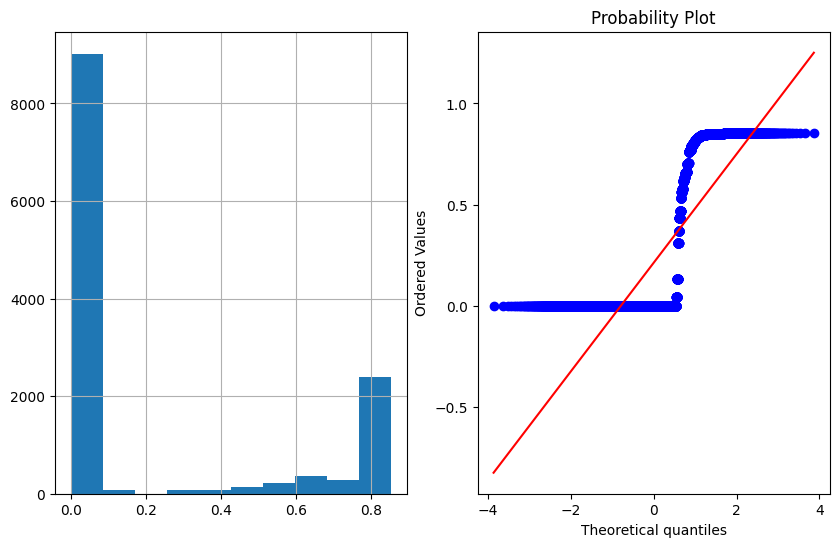

In [31]:
df['K'],parameters=stat.boxcox(df['K']+1)
plot_data(df,'K')

In [32]:
df.head(5)

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,0.705265,20.770894,2.068260,1014.863796,21.947147,loamy,2.517363,0.000000,0.000000,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,12.597502,20.160426,1.976480,1015.193528,20.643237,sandy,1.738996,1.909784,0.000000,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,17.388040,21.998299,2.000524,1014.184607,21.422312,clay,0.000000,0.000000,0.000000,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,13.995455,21.776377,2.019750,1015.053118,21.810567,chalky,2.378081,2.739889,0.850258,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,8.099854,20.075734,1.974351,1015.170238,21.930206,clay,0.000000,2.467429,0.000000,1100.0,1.222222


Outliers

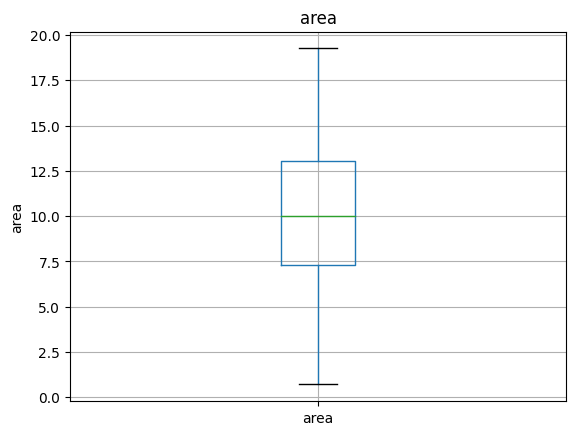

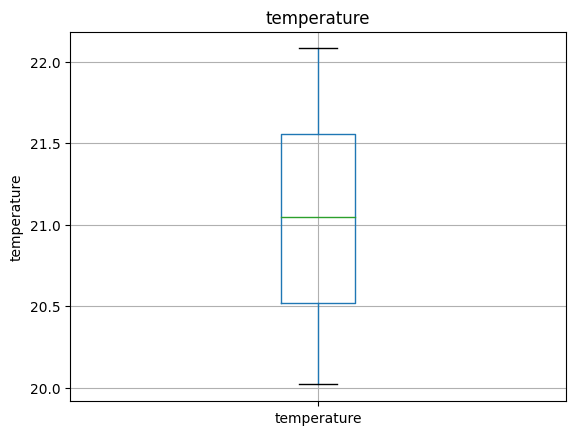

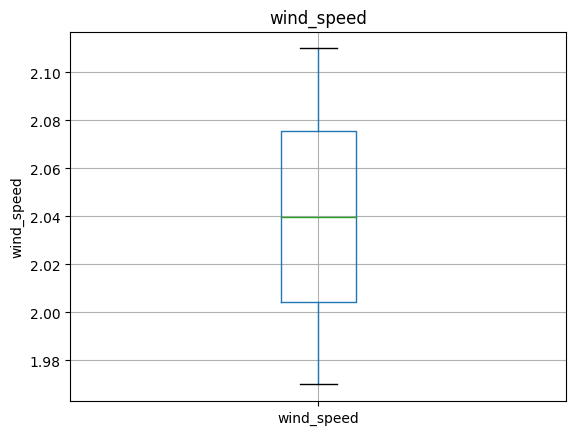

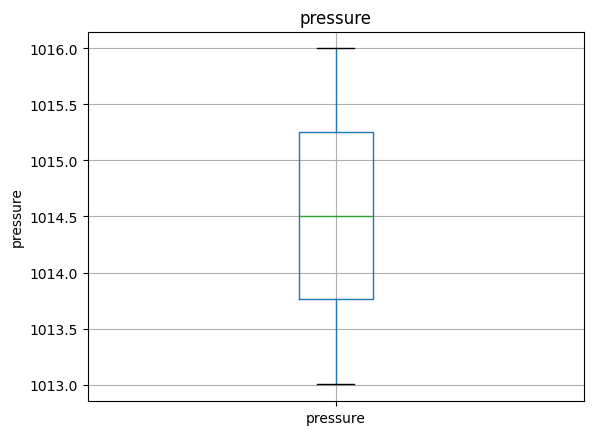

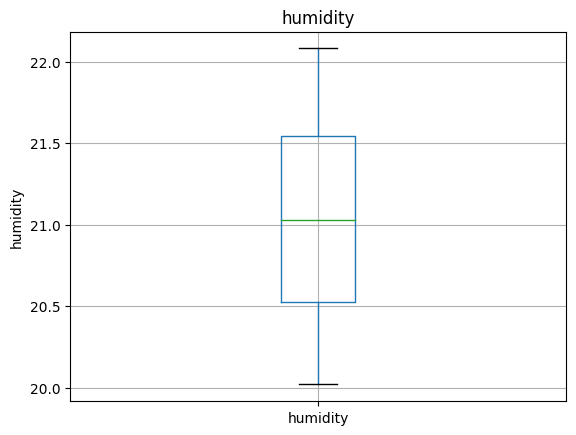

In [33]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        #data[feature]=np.log(data[feature])
        df[feature],parameters=stat.boxcox(df[feature]+1)
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

outliers in area feature will be handled later

Categorical features

In [34]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']

categorical_feature

['state_names', 'district_names', 'season_names', 'crop_names', 'soil_type']

In [35]:
df[categorical_feature].head()

,state_names,district_names,season_names,crop_names,soil_type
0,Maharashtra,AHMEDNAGAR,Autumn,Maize,loamy
1,Maharashtra,AHMEDNAGAR,Kharif,Arhar/Tur,sandy
2,Maharashtra,AHMEDNAGAR,Kharif,Bajra,clay
3,Maharashtra,AHMEDNAGAR,Kharif,Gram,chalky
4,Maharashtra,AHMEDNAGAR,Kharif,Jowar,clay


In [36]:
for feature in categorical_feature:
    print(feature,len(df[feature].unique()))

state_names 1
district_names 35
season_names 5
crop_names 34
soil_type 7


Finding the relationship between the categorical feature and dependent variable 

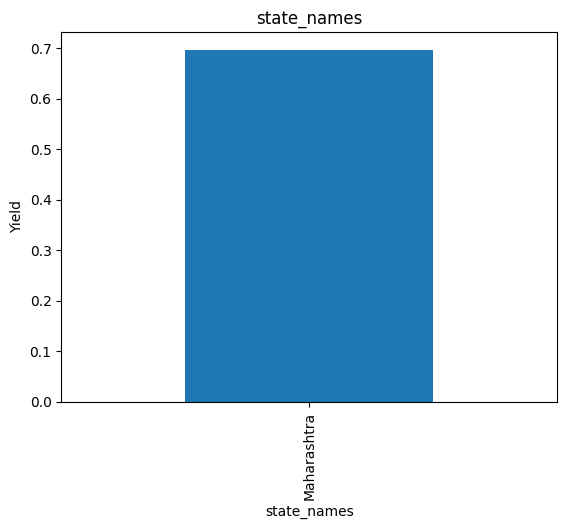

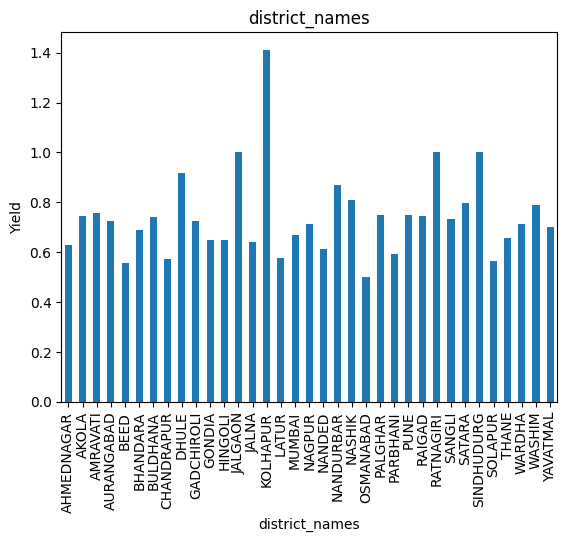

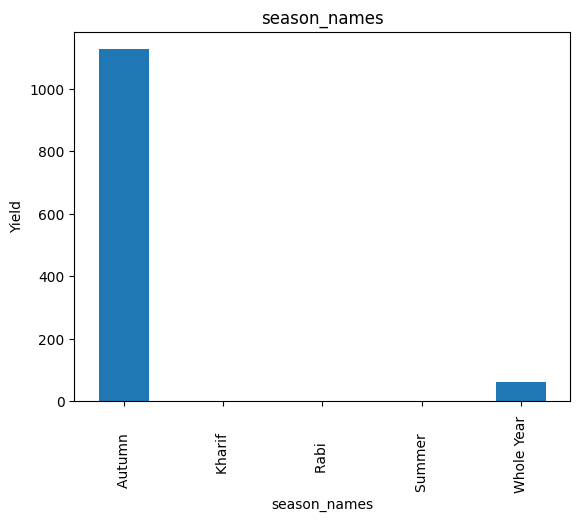

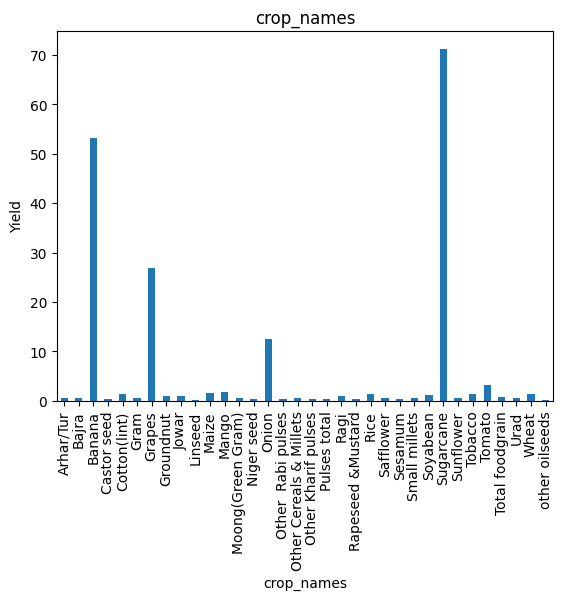

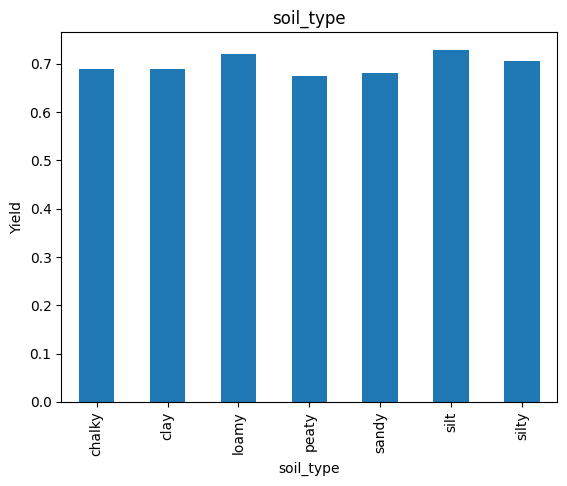

In [37]:
for feature in categorical_feature:
    data=df.copy()
    data.groupby(feature)['Yield'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.title(feature)
    plt.show()

/tmp/ipykernel_8058/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

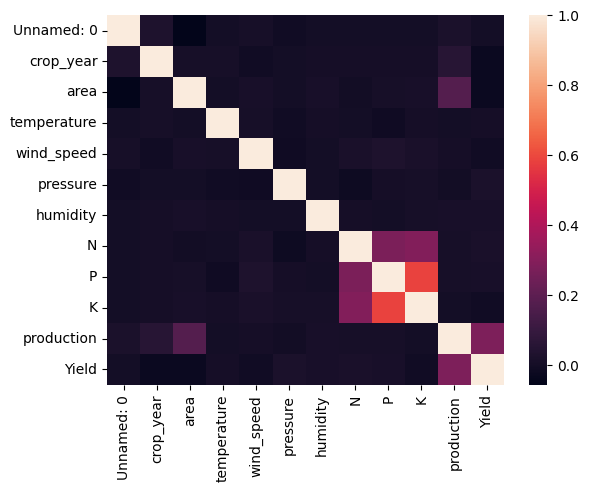

In [38]:
sns.heatmap(df.corr())

In [39]:
for feature in categorical_feature:
    print(feature,(df[feature].isnull().sum()))

state_names 0
district_names 0
season_names 0
crop_names 0
soil_type 0


 as there are no missing values in categorical feature let us handle rare categorical feature

In [40]:
for feature in categorical_feature:
    temp=df.groupby(feature)['Yield'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [41]:
df.head(10)

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Rare_var,Maize,0.694323,7.401843,1.233447,1.400145e+09,3.914223,loamy,2.517363,0.000000,0.000000,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,11.428268,7.268066,1.196888,1.401605e+09,3.824674,sandy,1.738996,1.909784,0.000000,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,15.554296,7.665308,1.206555,1.397142e+09,3.878720,clay,0.000000,0.000000,0.000000,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,12.639380,7.618197,1.214239,1.400983e+09,3.905052,chalky,2.378081,2.739889,0.850258,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,7.481511,7.249356,1.196029,1.401502e+09,3.913088,clay,0.000000,2.467429,0.000000,1100.0,1.222222
5,125196,Maharashtra,AHMEDNAGAR,1997,Kharif,Maize,9.525367,7.589636,1.236121,1.403860e+09,3.888878,sandy,1.499769,2.203492,0.826988,4700.0,1.068182
6,125197,Maharashtra,AHMEDNAGAR,1997,Kharif,Moong(Green Gram),10.665845,7.494694,1.237882,1.395735e+09,3.838042,peaty,2.410604,3.259953,0.854492,900.0,0.088235
7,125198,Maharashtra,AHMEDNAGAR,1997,Kharif,Rare_var,6.633981,7.530660,1.237498,1.392142e+09,3.784859,silty,1.645408,1.795871,0.000000,130.0,0.288248
8,125199,Maharashtra,AHMEDNAGAR,1997,Kharif,Ragi,8.832412,7.639701,1.227906,1.400671e+09,3.893760,silty,0.982071,1.577520,0.630192,2100.0,0.807692
9,125200,Maharashtra,AHMEDNAGAR,1997,Kharif,Rice,9.918597,7.586930,1.248854,1.399528e+09,3.844072,chalky,0.000000,0.000000,0.000000,7200.0,1.220339


Categorical feature encoding based on target guided ordinal encoding

In [42]:
for feature in categorical_feature:
    labels_ordered=df.groupby([feature])['Yield'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [43]:
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,0,30,1997,4,22,0.694323,7.401843,1.233447,1.400145e+09,3.914223,4,2.517363,0.000000,0.000000,1113.0,1113.000000
1,125192,0,30,1997,2,11,11.428268,7.268066,1.196888,1.401605e+09,3.824674,0,1.738996,1.909784,0.000000,6300.0,0.357955
2,125193,0,30,1997,2,14,15.554296,7.665308,1.206555,1.397142e+09,3.878720,3,0.000000,0.000000,0.000000,152800.0,0.557461
3,125194,0,30,1997,2,12,12.639380,7.618197,1.214239,1.400983e+09,3.905052,6,2.378081,2.739889,0.850258,18600.0,0.455882
4,125195,0,30,1997,2,15,7.481511,7.249356,1.196029,1.401502e+09,3.913088,3,0.000000,2.467429,0.000000,1100.0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,0,23,2014,0,15,9.398666,7.588254,1.206369,1.397662e+09,3.783151,2,1.669585,1.825140,0.000000,3300.0,0.825000
12624,137815,0,23,2014,0,22,7.942870,7.603980,1.227673,1.404309e+09,3.867835,5,1.647313,2.347047,0.790400,200.0,0.153846
12625,137816,0,23,2014,0,19,12.147240,7.634219,1.217315,1.396468e+09,3.783099,0,0.000000,0.000000,0.000000,26800.0,0.920962
12626,137817,0,23,2014,1,17,10.553231,7.574050,1.208116,1.396279e+09,3.906707,6,1.148153,1.349624,0.000000,11500.0,1.223404


handling outliers  
data is Gaussian Distributed 

In [44]:
df['area'].isnull().sum()

0

/tmp/ipykernel_8058/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

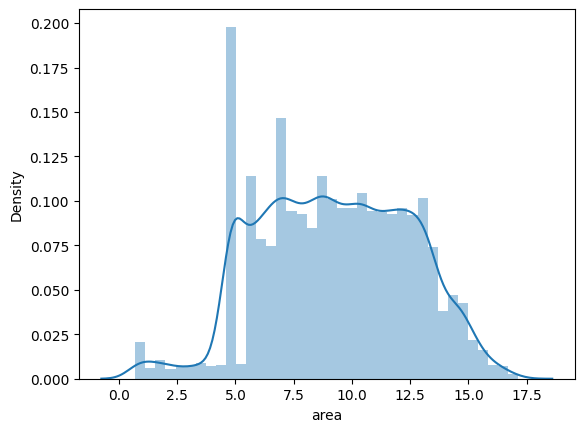

In [45]:
sns.distplot(df['area'])

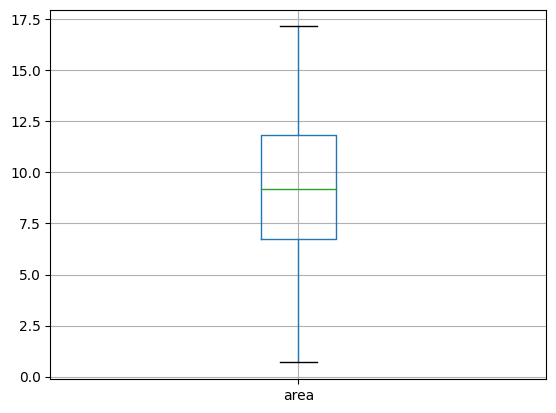

In [46]:
figure=df.boxplot(column='area')

Feature Scaling

In [47]:
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,0,30,1997,4,22,0.694323,7.401843,1.233447,1.400145e+09,3.914223,4,2.517363,0.000000,0.000000,1113.0,1113.000000
1,125192,0,30,1997,2,11,11.428268,7.268066,1.196888,1.401605e+09,3.824674,0,1.738996,1.909784,0.000000,6300.0,0.357955
2,125193,0,30,1997,2,14,15.554296,7.665308,1.206555,1.397142e+09,3.878720,3,0.000000,0.000000,0.000000,152800.0,0.557461
3,125194,0,30,1997,2,12,12.639380,7.618197,1.214239,1.400983e+09,3.905052,6,2.378081,2.739889,0.850258,18600.0,0.455882
4,125195,0,30,1997,2,15,7.481511,7.249356,1.196029,1.401502e+09,3.913088,3,0.000000,2.467429,0.000000,1100.0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,0,23,2014,0,15,9.398666,7.588254,1.206369,1.397662e+09,3.783151,2,1.669585,1.825140,0.000000,3300.0,0.825000
12624,137815,0,23,2014,0,22,7.942870,7.603980,1.227673,1.404309e+09,3.867835,5,1.647313,2.347047,0.790400,200.0,0.153846
12625,137816,0,23,2014,0,19,12.147240,7.634219,1.217315,1.396468e+09,3.783099,0,0.000000,0.000000,0.000000,26800.0,0.920962
12626,137817,0,23,2014,1,17,10.553231,7.574050,1.208116,1.396279e+09,3.906707,6,1.148153,1.349624,0.000000,11500.0,1.223404


In [48]:
feature_scale=[feature for feature in df.columns if feature not in ['Unnamed: 0','Yield']]
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
min_max=min_max.fit_transform(df[feature_scale])
df_minmax=pd.DataFrame(min_max,columns=feature_scale)
df_minmax.head()

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
0,0.0,0.909091,0.0,1.0,0.916667,0.000000,0.369900,0.705912,0.620475,0.937886,0.666667,0.780843,0.000000,0.000000,0.000056
1,0.0,0.909091,0.0,0.5,0.458333,0.652558,0.069628,0.047095,0.730531,0.311117,0.000000,0.539407,0.585832,0.000000,0.000314
2,0.0,0.909091,0.0,0.5,0.583333,0.903395,0.961265,0.221308,0.394029,0.689397,0.500000,0.000000,0.000000,0.000000,0.007621
3,0.0,0.909091,0.0,0.5,0.500000,0.726186,0.855521,0.359772,0.683657,0.873697,1.000000,0.737640,0.840469,0.995045,0.000928
4,0.0,0.909091,0.0,0.5,0.625000,0.412619,0.027634,0.031612,0.722755,0.929942,0.500000,0.000000,0.756891,0.000000,0.000055


In [49]:
data = pd.concat([df[['Yield']].reset_index(drop=True),pd.DataFrame(df_minmax,columns=feature_scale)],axis=1)

In [50]:
min_max

array([[0.00000000e+00, 9.09090909e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.55120525e-05],
       [0.00000000e+00, 9.09090909e-01, 0.00000000e+00, ...,
        5.85831793e-01, 0.00000000e+00, 3.14219165e-04],
       [0.00000000e+00, 9.09090909e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.62106166e-03],
       ...,
       [0.00000000e+00, 6.96969697e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.33667835e-03],
       [0.00000000e+00, 6.96969697e-01, 1.00000000e+00, ...,
        4.14000914e-01, 0.00000000e+00, 5.73574667e-04],
       [0.00000000e+00, 6.96969697e-01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.76163733e-02]])

In [51]:
data.head()

,Yield,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
0,1113.000000,0.0,0.909091,0.0,1.0,0.916667,0.000000,0.369900,0.705912,0.620475,0.937886,0.666667,0.780843,0.000000,0.000000,0.000056
1,0.357955,0.0,0.909091,0.0,0.5,0.458333,0.652558,0.069628,0.047095,0.730531,0.311117,0.000000,0.539407,0.585832,0.000000,0.000314
2,0.557461,0.0,0.909091,0.0,0.5,0.583333,0.903395,0.961265,0.221308,0.394029,0.689397,0.500000,0.000000,0.000000,0.000000,0.007621
3,0.455882,0.0,0.909091,0.0,0.5,0.500000,0.726186,0.855521,0.359772,0.683657,0.873697,1.000000,0.737640,0.840469,0.995045,0.000928
4,1.222222,0.0,0.909091,0.0,0.5,0.625000,0.412619,0.027634,0.031612,0.722755,0.929942,0.500000,0.000000,0.756891,0.000000,0.000055


In [52]:
data.isnull().sum()

Yield             0
state_names       0
district_names    0
crop_year         0
season_names      0
crop_names        0
area              0
temperature       0
wind_speed        0
pressure          0
humidity          0
soil_type         0
N                 0
P                 0
K                 0
production        0
dtype: int64

<Axes: >

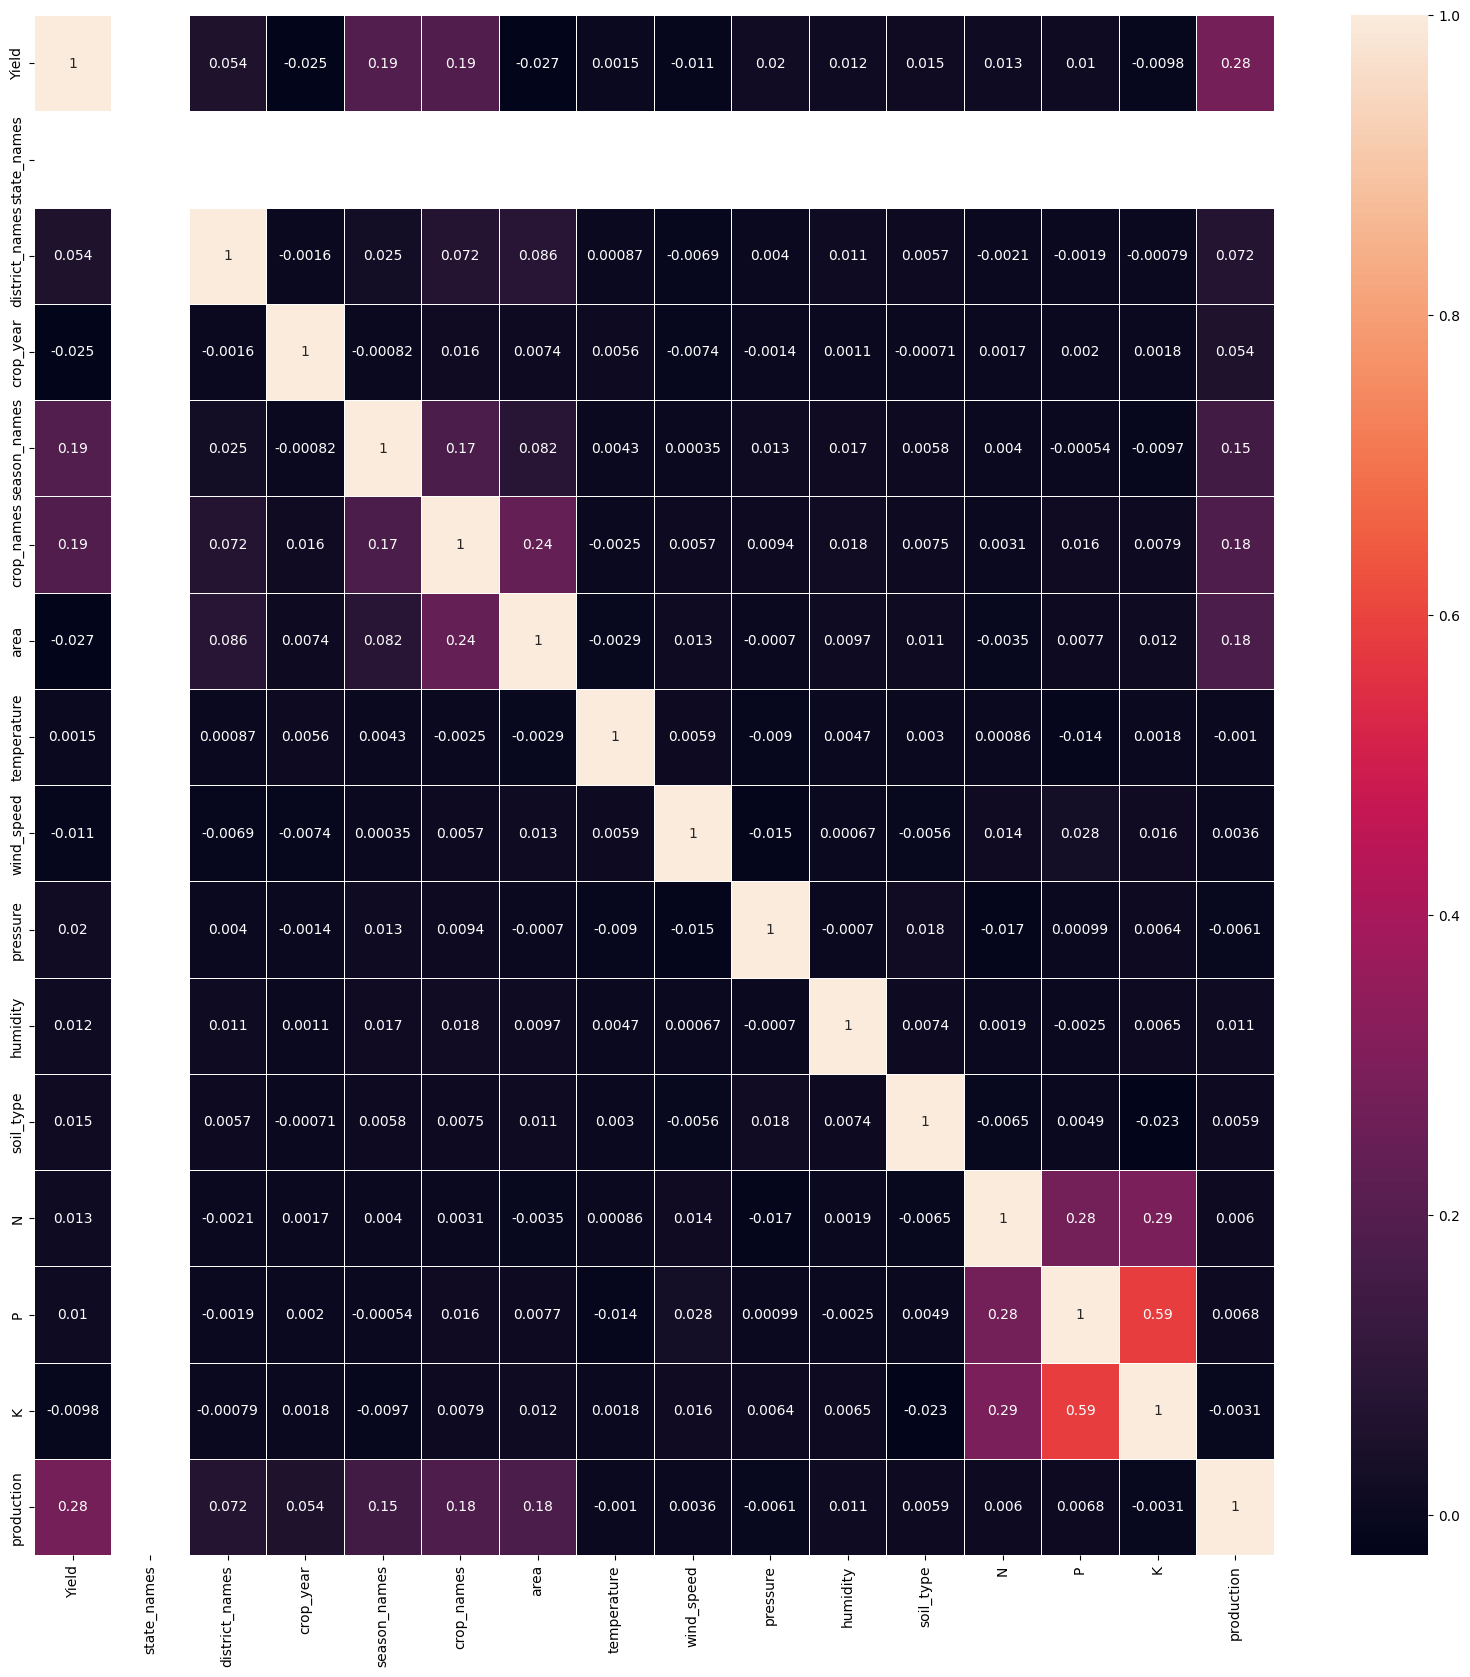

In [53]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

In [54]:
y=data['Yield']
x=data.drop(['Yield'],axis=1)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_score(x):
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(min_max,i)] for i in range(min_max.shape[1])], columns=["FEATURE", "VIF_SCORE"])

vif_score(x)

/config/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,FEATURE,VIF_SCORE
0,state_names,NaN
1,district_names,4.311133
2,crop_year,3.370330
3,season_names,3.046256
4,crop_names,5.085063
5,area,7.582508
6,temperature,3.643067
7,wind_speed,3.637648
8,pressure,3.641390
9,humidity,3.686095


In [56]:
data.to_csv('cyield_preprocessed.csv',index=False)

splitting the dataset into train and test to avoid overfitting

In [57]:
df1=pd.read_csv("../data/cyield_preprocessed.csv")

In [62]:
df1

,Yield,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
0,1113.000000,0.0,0.909091,0.0,1.00,0.916667,0.000000,0.369900,0.705912,0.620475,0.937886,0.666667,0.780843,0.000000,0.000000,0.000056
1,0.357955,0.0,0.909091,0.0,0.50,0.458333,0.652558,0.069628,0.047095,0.730531,0.311117,0.000000,0.539407,0.585832,0.000000,0.000314
2,0.557461,0.0,0.909091,0.0,0.50,0.583333,0.903395,0.961265,0.221308,0.394029,0.689397,0.500000,0.000000,0.000000,0.000000,0.007621
3,0.455882,0.0,0.909091,0.0,0.50,0.500000,0.726186,0.855521,0.359772,0.683657,0.873697,1.000000,0.737640,0.840469,0.995045,0.000928
4,1.222222,0.0,0.909091,0.0,0.50,0.625000,0.412619,0.027634,0.031612,0.722755,0.929942,0.500000,0.000000,0.756891,0.000000,0.000055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,0.825000,0.0,0.696970,1.0,0.00,0.625000,0.529170,0.788312,0.217958,0.433215,0.020492,0.333333,0.517877,0.559867,0.000000,0.000165
12624,0.153846,0.0,0.696970,1.0,0.00,0.916667,0.440667,0.823608,0.601856,0.934470,0.613206,0.833333,0.510969,0.719963,0.924994,0.000010
12625,0.920962,0.0,0.696970,1.0,0.00,0.791667,0.696267,0.891483,0.415210,0.343162,0.020130,0.000000,0.000000,0.000000,0.000000,0.001337
12626,1.223404,0.0,0.696970,1.0,0.25,0.708333,0.599361,0.756428,0.249433,0.328915,0.885278,1.000000,0.356138,0.414001,0.000000,0.000574


In [64]:
x= df1.drop(['Yield'],axis=1) 
y= df1['Yield']  

In [65]:
df1.head()


,Yield,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
0,1113.000000,0.0,0.909091,0.0,1.0,0.916667,0.000000,0.369900,0.705912,0.620475,0.937886,0.666667,0.780843,0.000000,0.000000,0.000056
1,0.357955,0.0,0.909091,0.0,0.5,0.458333,0.652558,0.069628,0.047095,0.730531,0.311117,0.000000,0.539407,0.585832,0.000000,0.000314
2,0.557461,0.0,0.909091,0.0,0.5,0.583333,0.903395,0.961265,0.221308,0.394029,0.689397,0.500000,0.000000,0.000000,0.000000,0.007621
3,0.455882,0.0,0.909091,0.0,0.5,0.500000,0.726186,0.855521,0.359772,0.683657,0.873697,1.000000,0.737640,0.840469,0.995045,0.000928
4,1.222222,0.0,0.909091,0.0,0.5,0.625000,0.412619,0.027634,0.031612,0.722755,0.929942,0.500000,0.000000,0.756891,0.000000,0.000055


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [69]:
lr.score(x_test,y_test)

0.12470473334065801